In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_columns', None)

In [2]:
players = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/players.csv')
clubs = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/clubs.csv')
valuations = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/player_valuations.csv')
games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/games.csv')
lineup = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_lineups.csv')
club_games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/club_games.csv')
game_events = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_events.csv')
appearances = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/appearances.csv')

In [3]:
# Players 테이블에서 필요없는 칼럼 제거
players = players.drop(['last_season', 'current_club_id', 'image_url', 'url', 'first_name', 'last_name', 'agent_name', 'city_of_birth', 'contract_expiration_date', 'market_value_in_eur'], axis=1)

In [4]:
players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur
0,10,Miroslav Klose,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,IT1,Società Sportiva Lazio S.p.A.,30000000.0
1,26,Roman Weidenfeller,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,L1,Borussia Dortmund,8000000.0
2,65,Dimitar Berbatov,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,34500000.0
3,77,Lúcio,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,IT1,Juventus Football Club,24500000.0
4,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0


In [5]:
players['country_of_citizenship'].value_counts()

country_of_citizenship
Spain             1813
Italy             1794
France            1645
Brazil            1511
Turkey            1503
                  ... 
Réunion              1
India                1
Malawi               1
Seychelles           1
Southern Sudan       1
Name: count, Length: 182, dtype: int64

In [6]:
# # 프리미어리그만 선택
# players = players[players['current_club_domestic_competition_id'] == 'GB1']

In [7]:
# Valuations 에서 필요없는 칼럼 제거
valuations = valuations.drop(['player_club_domestic_competition_id'], axis=1)

In [8]:
valuations.head()

,player_id,date,market_value_in_eur,current_club_id
0,405973,2000-01-20,150000,3057
1,342216,2001-07-20,100000,1241
2,3132,2003-12-09,400000,126
3,6893,2003-12-15,900000,984
4,10,2004-10-04,7000000,398


In [9]:
#선수 몸값 변경 날짜 2017 ~ 2024까지
start_date = '2017-08-01'
end_date = '2024-12-31'
mask = (valuations['date'] >= start_date) & (valuations['date'] <= end_date)
valuations = valuations.loc[mask]

In [10]:
valuations = valuations.rename(columns={'date' : 'valuations_date'})

In [11]:
# Players + Valuations 테이블 결합
df_players = pd.merge(players, valuations, on='player_id')

In [12]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254164 entries, 0 to 254163
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             254164 non-null  int64  
 1   name                                  254164 non-null  object 
 2   player_code                           254164 non-null  object 
 3   country_of_birth                      240945 non-null  object 
 4   country_of_citizenship                248685 non-null  object 
 5   date_of_birth                         254055 non-null  object 
 6   sub_position                          253864 non-null  object 
 7   position                              254164 non-null  object 
 8   foot                                  247658 non-null  object 
 9   height_in_cm                          249441 non-null  float64
 10  current_club_domestic_competition_id  254164 non-null  object 
 11  

In [13]:
# 결측치 확인
df_players.isnull().sum()

player_id                                   0
name                                        0
player_code                                 0
country_of_birth                        13219
country_of_citizenship                   5479
date_of_birth                             109
sub_position                              300
position                                    0
foot                                     6506
height_in_cm                             4723
current_club_domestic_competition_id        0
current_club_name                           0
highest_market_value_in_eur                 0
valuations_date                             0
market_value_in_eur                         0
current_club_id                             0
dtype: int64

In [14]:
df_players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id
0,26,Roman Weidenfeller,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,L1,Borussia Dortmund,8000000.0,2017-12-28,750000,16
1,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0,2017-09-21,100000,27
2,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0,2017-12-28,100000,27
3,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0,2018-06-05,100000,27
4,215,Roque Santa Cruz,roque-santa-cruz,Paraguay,Paraguay,1981-08-16,Centre-Forward,Attack,right,193.0,ES1,Málaga CF,12000000.0,2017-11-30,250000,1084


In [15]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [16]:
appearances = appearances[appearances['competition_id'] == 'GB1']

In [17]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123609 entries, 6836 to 1555970
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   appearance_id           123609 non-null  object
 1   game_id                 123609 non-null  int64 
 2   player_id               123609 non-null  int64 
 3   player_club_id          123609 non-null  int64 
 4   player_current_club_id  123609 non-null  int64 
 5   date                    123609 non-null  object
 6   player_name             123609 non-null  object
 7   competition_id          123609 non-null  object
 8   yellow_cards            123609 non-null  int64 
 9   red_cards               123609 non-null  int64 
 10  goals                   123609 non-null  int64 
 11  assists                 123609 non-null  int64 
 12  minutes_played          123609 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 13.2+ MB


In [18]:
#Appreances 필요없는 칼럼 삭제
appearances = appearances.drop(['player_current_club_id'], axis=1)

In [19]:
#경기 출전 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (appearances['date'] >= start_date) & (appearances['date'] <= end_date)
appearances = appearances.loc[mask]

In [20]:
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,GB1,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,GB1,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,GB1,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,GB1,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,GB1,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,GB1,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,GB1,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,GB1,0,0,0,0,45


In [21]:
appearances = appearances.rename(columns={'date' : 'appearances_date'})

In [22]:
df_players = pd.merge(df_players, appearances, on='player_id')

In [23]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991830 entries, 0 to 991829
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             991830 non-null  int64  
 1   name                                  991830 non-null  object 
 2   player_code                           991830 non-null  object 
 3   country_of_birth                      970188 non-null  object 
 4   country_of_citizenship                970360 non-null  object 
 5   date_of_birth                         991830 non-null  object 
 6   sub_position                          991830 non-null  object 
 7   position                              991830 non-null  object 
 8   foot                                  990836 non-null  object 
 9   height_in_cm                          991803 non-null  float64
 10  current_club_domestic_competition_id  991830 non-null  object 
 11  

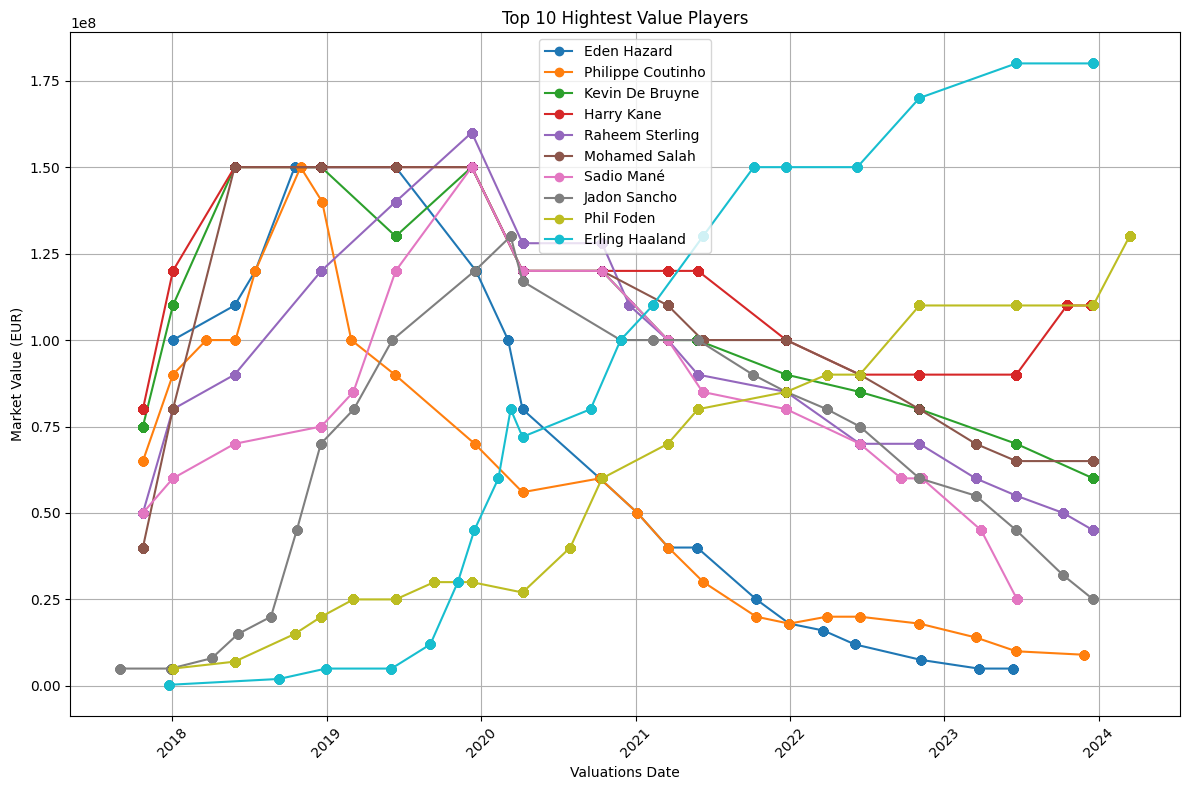

In [24]:
# valuations_date를 날짜 형식으로 변환
df_players['valuations_date'] = pd.to_datetime(df_players['valuations_date'])

# 각 선수의 최고 시장 가치 계산
highest_values = df_players.groupby(['player_id', 'player_name'])['market_value_in_eur'].max().nlargest(10)

# 최고 시장 가치를 기준으로 상위 5명의 선수 데이터 추출
top_players = df_players[df_players['player_id'].isin(highest_values.index.get_level_values(0))]

# 플롯 설정
plt.figure(figsize=(12, 8))

# 각 선수의 데이터를 그래프에 추가
for player_id, player_data in top_players.groupby('player_id'):
    player_name = player_data['player_name'].iloc[0]
    plt.plot(player_data['valuations_date'], player_data['market_value_in_eur'], marker='o', label=player_name)

# 그래프 스타일 및 레이블 설정
plt.xlabel('Valuations Date')
plt.ylabel('Market Value (EUR)')
plt.title('Top 10 Hightest Value Players')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

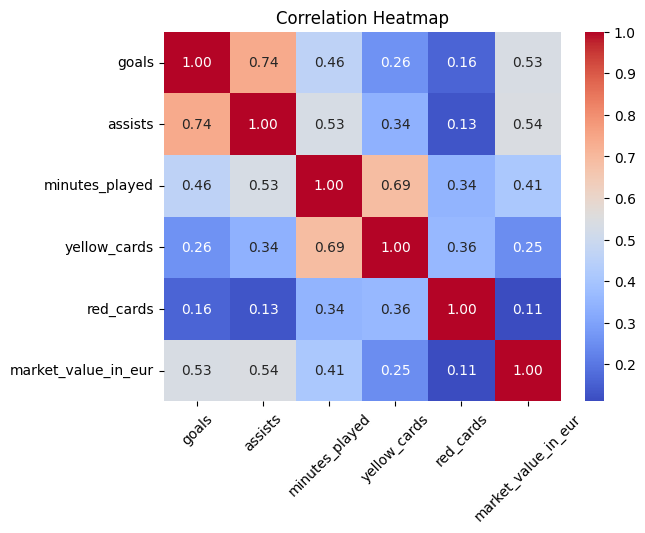

In [25]:
#DataFrame 새로 만들기
df_plyaers_test = pd.DataFrame(df_players)

# Goals, Assists, Minutes Played를 따로 구함
df_plyaers_test['goals'] = df_players.groupby('player_id')['goals'].transform('sum')
df_plyaers_test['assists'] = df_players.groupby('player_id')['assists'].transform('sum')
df_plyaers_test['minutes_played'] = df_players.groupby('player_id')['minutes_played'].transform('sum')
df_plyaers_test['yellow_cards'] = df_players.groupby('player_id')['yellow_cards'].transform('sum')
df_plyaers_test['red_cards'] = df_players.groupby('player_id')['red_cards'].transform('sum')

# 상관 계수 계산
correlation_matrix = df_plyaers_test[['goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards','market_value_in_eur']].corr()

# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [26]:
df_players.head()
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991830 entries, 0 to 991829
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             991830 non-null  int64         
 1   name                                  991830 non-null  object        
 2   player_code                           991830 non-null  object        
 3   country_of_birth                      970188 non-null  object        
 4   country_of_citizenship                970360 non-null  object        
 5   date_of_birth                         991830 non-null  object        
 6   sub_position                          991830 non-null  object        
 7   position                              991830 non-null  object        
 8   foot                                  990836 non-null  object        
 9   height_in_cm                          991803 non-null  floa

In [27]:
df_players

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,game_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050167_2865,3050167,11,2018-08-12,Stephan Lichtsteiner,GB1,0,0,0,0,55
1,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050247_2865,3050247,11,2018-10-22,Stephan Lichtsteiner,GB1,0,0,0,0,61
2,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050259_2865,3050259,11,2018-10-28,Stephan Lichtsteiner,GB1,1,0,0,0,45
3,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3056407_2865,3056407,11,2018-12-05,Stephan Lichtsteiner,GB1,0,0,0,0,54
4,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050317_2865,3050317,11,2018-12-08,Stephan Lichtsteiner,GB1,1,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991825,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,GB1,Nottingham Forest Football Club,25000000.0,2024-03-14,25000000,703,4095353_1005649,4095353,703,2024-03-10,Murillo,GB1,0,0,0,0,90
991826,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,GB1,Nottingham Forest Football Club,25000000.0,2024-03-14,25000000,703,4095366_1005649,4095366,703,2024-03-16,Murillo,GB1,0,0,0,0,90
991827,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,GB1,Chelsea Football Club,9000000.0,2023-07-25,4000000,631,4095170_1082850,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9
991828,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,GB1,Chelsea Football Club,9000000.0,2023-10-09,9000000,631,4095170_1082850,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9


In [28]:
# games = games[games['competition_id'] == 'GB1']

In [29]:
games = games.drop(['season', 'round', 'url', 'competition_type', 'stadium', 'aggregate', 'home_club_name', 'away_club_name', 'competition_id'], axis = 1)

In [30]:
games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
0,2321044,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,80200.0,Peter Sippel,4-2-3-1,4-3-2-1
1,2321060,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,23325.0,Wolfgang Stark,4-3-2-1,4-2-3-1
2,2321086,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,50000.0,Knut Kircher,4-2-3-1,4-2-3-1
3,2321152,2013-11-02,44,33,0,2,7.0,6.0,Jos Luhukay,Jens Keller,69277.0,Günter Perl,4-2-3-1,4-2-3-1
4,2321205,2013-12-21,41,39,2,3,14.0,9.0,Bert van Marwijk,Thomas Tuchel,50000.0,Bastian Dankert,4-2-3-1,4-4-2 Diamond


In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67421 entries, 0 to 67420
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67421 non-null  int64  
 1   date                    67421 non-null  object 
 2   home_club_id            67421 non-null  int64  
 3   away_club_id            67421 non-null  int64  
 4   home_club_goals         67421 non-null  int64  
 5   away_club_goals         67421 non-null  int64  
 6   home_club_position      47449 non-null  float64
 7   away_club_position      47449 non-null  float64
 8   home_club_manager_name  66675 non-null  object 
 9   away_club_manager_name  66675 non-null  object 
 10  attendance              57718 non-null  float64
 11  referee                 66823 non-null  object 
 12  home_club_formation     60823 non-null  object 
 13  away_club_formation     60969 non-null  object 
dtypes: float64(3), int64(5), object(6)
mem

In [32]:
#게임 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (games['date'] >= start_date) & (games['date'] <= end_date)
games = games.loc[mask]

In [33]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32835 entries, 1860 to 67420
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 32835 non-null  int64  
 1   date                    32835 non-null  object 
 2   home_club_id            32835 non-null  int64  
 3   away_club_id            32835 non-null  int64  
 4   home_club_goals         32835 non-null  int64  
 5   away_club_goals         32835 non-null  int64  
 6   home_club_position      22978 non-null  float64
 7   away_club_position      22978 non-null  float64
 8   home_club_manager_name  32475 non-null  object 
 9   away_club_manager_name  32475 non-null  object 
 10  attendance              24736 non-null  float64
 11  referee                 32565 non-null  object 
 12  home_club_formation     32143 non-null  object 
 13  away_club_formation     32251 non-null  object 
dtypes: float64(3), int64(5), object(6)
memor

In [34]:
games['attendance'] = games['attendance'].fillna(0)

In [35]:
games['attendance']

1860      6837.0
1861     14402.0
1862     16604.0
1863     12113.0
1864     25753.0
          ...   
67414     4735.0
67417    34200.0
67418     9410.0
67419    10261.0
67420     4119.0
Name: attendance, Length: 32835, dtype: float64

In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32835 entries, 1860 to 67420
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 32835 non-null  int64  
 1   date                    32835 non-null  object 
 2   home_club_id            32835 non-null  int64  
 3   away_club_id            32835 non-null  int64  
 4   home_club_goals         32835 non-null  int64  
 5   away_club_goals         32835 non-null  int64  
 6   home_club_position      22978 non-null  float64
 7   away_club_position      22978 non-null  float64
 8   home_club_manager_name  32475 non-null  object 
 9   away_club_manager_name  32475 non-null  object 
 10  attendance              32835 non-null  float64
 11  referee                 32565 non-null  object 
 12  home_club_formation     32143 non-null  object 
 13  away_club_formation     32251 non-null  object 
dtypes: float64(3), int64(5), object(6)
memor

In [37]:
lineup

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0
...,...,...,...,...,...,...,...,...,...,...
2145217,8f1390a3d67394d1387061e3e8d8b33a,2023-05-24,4080529,543771,46,Kristjan Asllani,substitutes,Defensive Midfield,14,0
2145218,6038e2ed925b06aed10a1a5ee017cf1a,2023-05-24,4080529,602124,430,Alessandro Bianco,substitutes,Central Midfield,42,0
2145219,59961ac7781642d465167882867b65a8,2023-05-24,4080529,780136,46,Aleksandar Stanković,substitutes,Defensive Midfield,50,0
2145220,ea8baaec103816bbdff7ba7703ad4d9e,2023-05-24,4080529,969192,46,Ebenezer Akinsanmiro,substitutes,Attacking Midfield,43,0


In [38]:
lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145222 entries, 0 to 2145221
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   date             object
 2   game_id          int64 
 3   player_id        int64 
 4   club_id          int64 
 5   player_name      object
 6   type             object
 7   position         object
 8   number           object
 9   team_captain     int64 
dtypes: int64(4), object(6)
memory usage: 163.7+ MB


In [39]:
lineup = lineup.drop(['game_lineups_id','player_name','number','date'], axis=1)

In [40]:
df_games = pd.merge(games, lineup, on='game_id')

In [41]:
df_games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,1667,162,starting_lineup,Goalkeeper,0
1,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,28845,162,starting_lineup,Right-Back,0
2,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,39152,162,starting_lineup,Centre-Forward,1
3,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,41063,1160,substitutes,Defensive Midfield,0
4,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,46552,162,starting_lineup,Centre-Back,0


In [42]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086971 entries, 0 to 1086970
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   game_id                 1086971 non-null  int64  
 1   date                    1086971 non-null  object 
 2   home_club_id            1086971 non-null  int64  
 3   away_club_id            1086971 non-null  int64  
 4   home_club_goals         1086971 non-null  int64  
 5   away_club_goals         1086971 non-null  int64  
 6   home_club_position      784166 non-null   float64
 7   away_club_position      784166 non-null   float64
 8   home_club_manager_name  1081666 non-null  object 
 9   away_club_manager_name  1081666 non-null  object 
 10  attendance              1086971 non-null  float64
 11  referee                 1081171 non-null  object 
 12  home_club_formation     1082249 non-null  object 
 13  away_club_formation     1084420 non-null  object 
 14  pl

In [43]:
clubs = clubs[clubs['domestic_competition_id'] == 'GB1']

In [44]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
23,603,cardiff-city,Cardiff City,GB1,NaN,28,25.5,24,85.7,8,Cardiff City Stadium,33280,€-655k,NaN,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/cardiff-city/s...
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,NaN,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...
42,3008,hull-city,Hull City,GB1,NaN,28,25.0,17,60.7,6,MKM Stadium,25586,+€7.50m,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/hull-city/star...
43,31,fc-liverpool,Liverpool Football Club,GB1,NaN,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...


In [45]:
clubs = clubs.drop(['club_code','total_market_value','coach_name','filename', 'url', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'domestic_competition_id'], axis=1)

In [46]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [47]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134842 entries, 0 to 134841
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                134842 non-null  int64  
 1   club_id                134842 non-null  int64  
 2   own_goals              134842 non-null  int64  
 3   own_position           94898 non-null   float64
 4   own_manager_name       133350 non-null  object 
 5   opponent_id            134842 non-null  int64  
 6   opponent_goals         134842 non-null  int64  
 7   opponent_position      94898 non-null   float64
 8   opponent_manager_name  133350 non-null  object 
 9   hosting                134842 non-null  object 
 10  is_win                 134842 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 11.3+ MB


In [48]:
club_games.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0


In [49]:
df_club = pd.merge

In [50]:
df_games[df_games['game_id'] == 3050170].head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
575,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,19948,631,substitutes,Goalkeeper,0
576,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,46741,631,starting_lineup,Centre-Back,0
577,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,48870,1110,substitutes,Goalkeeper,0
578,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,50202,631,substitutes,Left Winger,0
579,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52059,1110,starting_lineup,Centre-Back,0


In [51]:
club_games[club_games['game_id'] == 3050170]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
2097,3050170,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
69518,3050170,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1


In [52]:
df_games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,1667,162,starting_lineup,Goalkeeper,0
1,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,28845,162,starting_lineup,Right-Back,0
2,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,39152,162,starting_lineup,Centre-Forward,1
3,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,41063,1160,substitutes,Defensive Midfield,0
4,3047515,2018-09-21,162,1160,1,1,16.0,10.0,Leonardo Jardim,Bernard Blaquart,6837.0,Amaury Delerue,4-2-3-1,4-4-2,46552,162,starting_lineup,Centre-Back,0


In [53]:
home_club_games = games[['game_id', 'date', 'home_club_id', 'home_club_goals', 'home_club_position', 'home_club_manager_name', 'attendance', 'referee', 'home_club_formation']]

In [54]:
home_club_games.head()

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation
1860,3047515,2018-09-21,162,1,16.0,Leonardo Jardim,6837.0,Amaury Delerue,4-2-3-1
1861,3047523,2018-09-26,1162,2,16.0,Fabien Mercadal,14402.0,Antony Gautier,4-2-3-1
1862,3047527,2018-09-25,995,1,19.0,Miguel Cardoso,16604.0,Mikael Lesage,4-2-3-1
1863,3047572,2018-11-03,2969,0,17.0,Olivier Dall'Oglio,12113.0,Frank Schneider,4-3-3 Attacking
1864,3047575,2018-11-04,995,5,10.0,Vahid Halilhodzic,25753.0,Jérôme Brisard,4-3-3 Attacking


In [55]:
away_club_games = games[['game_id', 'date', 'away_club_id', 'away_club_goals', 'away_club_position', 'away_club_manager_name', 'attendance', 'referee', 'away_club_formation']]

In [56]:
away_club_games.head()

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation
1860,3047515,2018-09-21,1160,1,10.0,Bernard Blaquart,6837.0,Amaury Delerue,4-4-2
1861,3047523,2018-09-26,969,2,5.0,Michel Der Zakarian,14402.0,Antony Gautier,5-3-2
1862,3047527,2018-09-25,417,2,11.0,Patrick Vieira,16604.0,Mikael Lesage,5-3-2
1863,3047572,2018-11-03,1160,4,13.0,Bernard Blaquart,12113.0,Frank Schneider,4-4-2
1864,3047575,2018-11-04,855,0,20.0,Antoine Kombouaré,25753.0,Jérôme Brisard,5-4-1


In [57]:
club_games[club_games['game_id'] == 3050170]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
2097,3050170,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
69518,3050170,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1


In [58]:
home_club_games = pd.merge(home_club_games, club_games, left_on=['game_id', 'home_club_id'], right_on=['game_id', 'club_id'], how='inner')

In [59]:
home_club_games.head()

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,3047515,2018-09-21,162,1,16.0,Leonardo Jardim,6837.0,Amaury Delerue,4-2-3-1,162,1,16.0,Leonardo Jardim,1160,1,10.0,Bernard Blaquart,Home,0
1,3047523,2018-09-26,1162,2,16.0,Fabien Mercadal,14402.0,Antony Gautier,4-2-3-1,1162,2,16.0,Fabien Mercadal,969,2,5.0,Michel Der Zakarian,Home,0
2,3047527,2018-09-25,995,1,19.0,Miguel Cardoso,16604.0,Mikael Lesage,4-2-3-1,995,1,19.0,Miguel Cardoso,417,2,11.0,Patrick Vieira,Home,0
3,3047572,2018-11-03,2969,0,17.0,Olivier Dall'Oglio,12113.0,Frank Schneider,4-3-3 Attacking,2969,0,17.0,Olivier Dall'Oglio,1160,4,13.0,Bernard Blaquart,Home,0
4,3047575,2018-11-04,995,5,10.0,Vahid Halilhodzic,25753.0,Jérôme Brisard,4-3-3 Attacking,995,5,10.0,Vahid Halilhodzic,855,0,20.0,Antoine Kombouaré,Home,1


In [60]:
home_club_games[home_club_games['home_club_id'] != home_club_games['club_id']]

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win


In [61]:
home_club_games = home_club_games.drop(['own_goals', 'own_position', 'own_manager_name','hosting', 'club_id'], axis=1)

In [62]:
home_club_games.head()

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win
0,3047515,2018-09-21,162,1,16.0,Leonardo Jardim,6837.0,Amaury Delerue,4-2-3-1,1160,1,10.0,Bernard Blaquart,0
1,3047523,2018-09-26,1162,2,16.0,Fabien Mercadal,14402.0,Antony Gautier,4-2-3-1,969,2,5.0,Michel Der Zakarian,0
2,3047527,2018-09-25,995,1,19.0,Miguel Cardoso,16604.0,Mikael Lesage,4-2-3-1,417,2,11.0,Patrick Vieira,0
3,3047572,2018-11-03,2969,0,17.0,Olivier Dall'Oglio,12113.0,Frank Schneider,4-3-3 Attacking,1160,4,13.0,Bernard Blaquart,0
4,3047575,2018-11-04,995,5,10.0,Vahid Halilhodzic,25753.0,Jérôme Brisard,4-3-3 Attacking,855,0,20.0,Antoine Kombouaré,1


In [63]:
away_club_games = pd.merge(away_club_games, club_games, left_on=['game_id', 'away_club_id'], right_on=['game_id', 'club_id'], how='inner')

In [64]:
away_club_games = away_club_games.drop(['own_goals', 'own_position', 'own_manager_name','hosting', 'club_id'], axis=1)

In [65]:
away_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 32835 non-null  int64  
 1   date                    32835 non-null  object 
 2   away_club_id            32835 non-null  int64  
 3   away_club_goals         32835 non-null  int64  
 4   away_club_position      22978 non-null  float64
 5   away_club_manager_name  32475 non-null  object 
 6   attendance              32835 non-null  float64
 7   referee                 32565 non-null  object 
 8   away_club_formation     32251 non-null  object 
 9   opponent_id             32835 non-null  int64  
 10  opponent_goals          32835 non-null  int64  
 11  opponent_position       22978 non-null  float64
 12  opponent_manager_name   32475 non-null  object 
 13  is_win                  32835 non-null  int64  
dtypes: float64(3), int64(6), object(5)
mem

In [66]:
# date 열을 datetime 타입으로 변환
away_club_games['date'] = pd.to_datetime(away_club_games['date'])

In [67]:
# season을 나타내는 함수 정의
def get_season(date):
    year = date.year
    month = date.month
    
    if month >= 8 and month <= 12:
        return year
    elif month >= 1 and month <= 5:
        return year - 1
    else:
        return year - 1
    
# date를 기반으로 season 칼럼 생성
away_club_games['season'] = away_club_games['date'].apply(get_season)

In [68]:
away_club_games[['date', 'season']]

,date,season
0,2018-09-21,2018
1,2018-09-26,2018
2,2018-09-25,2018
3,2018-11-03,2018
4,2018-11-04,2018
...,...,...
32830,2022-01-22,2021
32831,2018-08-29,2018
32832,2023-08-29,2023
32833,2019-01-15,2018


In [69]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 32835 non-null  int64  
 1   date                    32835 non-null  object 
 2   home_club_id            32835 non-null  int64  
 3   home_club_goals         32835 non-null  int64  
 4   home_club_position      22978 non-null  float64
 5   home_club_manager_name  32475 non-null  object 
 6   attendance              32835 non-null  float64
 7   referee                 32565 non-null  object 
 8   home_club_formation     32143 non-null  object 
 9   opponent_id             32835 non-null  int64  
 10  opponent_goals          32835 non-null  int64  
 11  opponent_position       22978 non-null  float64
 12  opponent_manager_name   32475 non-null  object 
 13  is_win                  32835 non-null  int64  
dtypes: float64(3), int64(6), object(5)
mem

In [70]:
# date 열을 datetime 타입으로 변환
home_club_games['date'] = pd.to_datetime(home_club_games['date'])

# season을 나타내는 함수 정의
def get_season(date):
    year = date.year
    month = date.month
    
    if month >= 8 and month <= 12:
        return year
    elif month >= 1 and month <= 5:
        return year - 1
    else:
        return year - 1
    
# date를 기반으로 season 칼럼 생성
home_club_games['season'] = home_club_games['date'].apply(get_season)

In [71]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 32835 non-null  int64         
 1   date                    32835 non-null  datetime64[ns]
 2   home_club_id            32835 non-null  int64         
 3   home_club_goals         32835 non-null  int64         
 4   home_club_position      22978 non-null  float64       
 5   home_club_manager_name  32475 non-null  object        
 6   attendance              32835 non-null  float64       
 7   referee                 32565 non-null  object        
 8   home_club_formation     32143 non-null  object        
 9   opponent_id             32835 non-null  int64         
 10  opponent_goals          32835 non-null  int64         
 11  opponent_position       22978 non-null  float64       
 12  opponent_manager_name   32475 non-null  object

In [72]:
away_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 32835 non-null  int64         
 1   date                    32835 non-null  datetime64[ns]
 2   away_club_id            32835 non-null  int64         
 3   away_club_goals         32835 non-null  int64         
 4   away_club_position      22978 non-null  float64       
 5   away_club_manager_name  32475 non-null  object        
 6   attendance              32835 non-null  float64       
 7   referee                 32565 non-null  object        
 8   away_club_formation     32251 non-null  object        
 9   opponent_id             32835 non-null  int64         
 10  opponent_goals          32835 non-null  int64         
 11  opponent_position       22978 non-null  float64       
 12  opponent_manager_name   32475 non-null  object

In [73]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [74]:
home_club_games = pd.merge(home_club_games, clubs[['club_id', 'name']], left_on='home_club_id', right_on='club_id', how='left')

In [75]:
home_club_games= home_club_games.drop(['club_id'], axis=1)

In [76]:
away_club_games = pd.merge(away_club_games, clubs[['club_id', 'name']], left_on='away_club_id', right_on='club_id', how='left')

In [77]:
away_club_games= away_club_games.drop(['club_id'], axis=1)

In [78]:
home_club_games = home_club_games.rename(columns={'name' : 'home_club_name'})

In [79]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 32835 non-null  int64         
 1   date                    32835 non-null  datetime64[ns]
 2   home_club_id            32835 non-null  int64         
 3   home_club_goals         32835 non-null  int64         
 4   home_club_position      22978 non-null  float64       
 5   home_club_manager_name  32475 non-null  object        
 6   attendance              32835 non-null  float64       
 7   referee                 32565 non-null  object        
 8   home_club_formation     32143 non-null  object        
 9   opponent_id             32835 non-null  int64         
 10  opponent_goals          32835 non-null  int64         
 11  opponent_position       22978 non-null  float64       
 12  opponent_manager_name   32475 non-null  object

In [80]:
home_club_games = pd.merge(home_club_games, clubs[['club_id', 'name']], left_on='opponent_id', right_on='club_id', how='left')

In [81]:
home_club_games.head()

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,club_id,name
0,3047515,2018-09-21,162,1,16.0,Leonardo Jardim,6837.0,Amaury Delerue,4-2-3-1,1160,1,10.0,Bernard Blaquart,0,2018,NaN,NaN,NaN
1,3047523,2018-09-26,1162,2,16.0,Fabien Mercadal,14402.0,Antony Gautier,4-2-3-1,969,2,5.0,Michel Der Zakarian,0,2018,NaN,NaN,NaN
2,3047527,2018-09-25,995,1,19.0,Miguel Cardoso,16604.0,Mikael Lesage,4-2-3-1,417,2,11.0,Patrick Vieira,0,2018,NaN,NaN,NaN
3,3047572,2018-11-03,2969,0,17.0,Olivier Dall'Oglio,12113.0,Frank Schneider,4-3-3 Attacking,1160,4,13.0,Bernard Blaquart,0,2018,NaN,NaN,NaN
4,3047575,2018-11-04,995,5,10.0,Vahid Halilhodzic,25753.0,Jérôme Brisard,4-3-3 Attacking,855,0,20.0,Antoine Kombouaré,1,2018,NaN,NaN,NaN


In [82]:
clubs.head()

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023


In [83]:
away_club_games

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,name
0,3047515,2018-09-21,1160,1,10.0,Bernard Blaquart,6837.0,Amaury Delerue,4-4-2,162,1,16.0,Leonardo Jardim,0,2018,NaN
1,3047523,2018-09-26,969,2,5.0,Michel Der Zakarian,14402.0,Antony Gautier,5-3-2,1162,2,16.0,Fabien Mercadal,0,2018,NaN
2,3047527,2018-09-25,417,2,11.0,Patrick Vieira,16604.0,Mikael Lesage,5-3-2,995,1,19.0,Miguel Cardoso,1,2018,NaN
3,3047572,2018-11-03,1160,4,13.0,Bernard Blaquart,12113.0,Frank Schneider,4-4-2,2969,0,17.0,Olivier Dall'Oglio,1,2018,NaN
4,3047575,2018-11-04,855,0,20.0,Antoine Kombouaré,25753.0,Jérôme Brisard,5-4-1,995,5,10.0,Vahid Halilhodzic,0,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,3705086,2022-01-22,3026,1,NaN,Dougie Imrie,4735.0,Nick Walsh,3-5-2 flat,987,2,NaN,Graham Alexander,0,2021,NaN
32831,3092951,2018-08-29,713,0,NaN,Aleksey Baga,34200.0,Anthony Taylor,4-5-1,383,3,NaN,Mark van Bommel,0,2018,NaN
32832,4164101,2023-08-29,1194,1,NaN,Matt Taylor,9410.0,Michael Salisbury,Starting Line-up: 4-2-3-1,512,6,NaN,Alex Neil,0,2023,NaN
32833,3143618,2019-01-15,3054,3,NaN,Sam Ricketts,10261.0,Geoff Eltringham,4-2-3-1,512,2,NaN,Nathan Jones,1,2018,NaN


In [84]:
away_club_games = pd.merge(away_club_games, clubs[['club_id', 'name']], left_on='opponent_id', right_on='club_id', how='left')

In [85]:
home_club_games

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,club_id,name
0,3047515,2018-09-21,162,1,16.0,Leonardo Jardim,6837.0,Amaury Delerue,4-2-3-1,1160,1,10.0,Bernard Blaquart,0,2018,NaN,NaN,NaN
1,3047523,2018-09-26,1162,2,16.0,Fabien Mercadal,14402.0,Antony Gautier,4-2-3-1,969,2,5.0,Michel Der Zakarian,0,2018,NaN,NaN,NaN
2,3047527,2018-09-25,995,1,19.0,Miguel Cardoso,16604.0,Mikael Lesage,4-2-3-1,417,2,11.0,Patrick Vieira,0,2018,NaN,NaN,NaN
3,3047572,2018-11-03,2969,0,17.0,Olivier Dall'Oglio,12113.0,Frank Schneider,4-3-3 Attacking,1160,4,13.0,Bernard Blaquart,0,2018,NaN,NaN,NaN
4,3047575,2018-11-04,995,5,10.0,Vahid Halilhodzic,25753.0,Jérôme Brisard,4-3-3 Attacking,855,0,20.0,Antoine Kombouaré,1,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,3705086,2022-01-22,987,2,NaN,Graham Alexander,4735.0,Nick Walsh,4-3-3 Attacking,3026,1,NaN,Dougie Imrie,1,2021,NaN,NaN,NaN
32831,3092951,2018-08-29,383,3,NaN,Mark van Bommel,34200.0,Anthony Taylor,4-3-3 Defending,713,0,NaN,Aleksey Baga,1,2018,NaN,NaN,NaN
32832,4164101,2023-08-29,512,6,NaN,Alex Neil,9410.0,Michael Salisbury,Starting Line-up: 4-2-3-1,1194,1,NaN,Matt Taylor,1,2023,Stoke City,NaN,NaN
32833,3143618,2019-01-15,512,2,NaN,Nathan Jones,10261.0,Geoff Eltringham,4-4-2 Diamond,3054,3,NaN,Sam Ricketts,0,2018,Stoke City,NaN,NaN


In [86]:
home_club_games = home_club_games.rename(columns={'name' : 'opponent_name'})

In [87]:
home_club_games = home_club_games.drop(['club_id'], axis=1)

In [88]:
away_club_games = away_club_games.rename(columns={'name_x' : 'away_club_name', 'name_y' : 'opponent_name'})

In [89]:
away_club_games = away_club_games.drop(['club_id'], axis=1)

In [90]:
df_players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,game_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050167_2865,3050167,11,2018-08-12,Stephan Lichtsteiner,GB1,0,0,0,0,55
1,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050247_2865,3050247,11,2018-10-22,Stephan Lichtsteiner,GB1,0,0,0,0,61
2,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050259_2865,3050259,11,2018-10-28,Stephan Lichtsteiner,GB1,1,0,0,0,45
3,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3056407_2865,3056407,11,2018-12-05,Stephan Lichtsteiner,GB1,0,0,0,0,54
4,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050317_2865,3050317,11,2018-12-08,Stephan Lichtsteiner,GB1,1,0,0,0,45


In [91]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991830 entries, 0 to 991829
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             991830 non-null  int64         
 1   name                                  991830 non-null  object        
 2   player_code                           991830 non-null  object        
 3   country_of_birth                      970188 non-null  object        
 4   country_of_citizenship                970360 non-null  object        
 5   date_of_birth                         991830 non-null  object        
 6   sub_position                          991830 non-null  object        
 7   position                              991830 non-null  object        
 8   foot                                  990836 non-null  object        
 9   height_in_cm                          991803 non-null  floa

In [92]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32835 entries, 0 to 32834
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 32835 non-null  int64         
 1   date                    32835 non-null  datetime64[ns]
 2   home_club_id            32835 non-null  int64         
 3   home_club_goals         32835 non-null  int64         
 4   home_club_position      22978 non-null  float64       
 5   home_club_manager_name  32475 non-null  object        
 6   attendance              32835 non-null  float64       
 7   referee                 32565 non-null  object        
 8   home_club_formation     32143 non-null  object        
 9   opponent_id             32835 non-null  int64         
 10  opponent_goals          32835 non-null  int64         
 11  opponent_position       22978 non-null  float64       
 12  opponent_manager_name   32475 non-null  object

In [93]:
home_club_games_players = pd.merge(home_club_games, df_players, left_on=['game_id', 'home_club_id'], right_on=['game_id', 'player_club_id'], how='inner')

In [94]:
home_club_games_players

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,opponent_name,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club,52059,Zanka,zanka,Denmark,Denmark,1990-04-23,Centre-Back,Defender,right,189.0,GB1,Brentford Football Club,5000000.0,2018-01-02,3500000,1148,3050170_52059,1110,2018-08-11,Zanka,GB1,0,0,0,0,90
1,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club,52059,Zanka,zanka,Denmark,Denmark,1990-04-23,Centre-Back,Defender,right,189.0,GB1,Brentford Football Club,5000000.0,2018-05-28,5000000,1148,3050170_52059,1110,2018-08-11,Zanka,GB1,0,0,0,0,90
2,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club,52059,Zanka,zanka,Denmark,Denmark,1990-04-23,Centre-Back,Defender,right,189.0,GB1,Brentford Football Club,5000000.0,2018-12-19,5000000,1148,3050170_52059,1110,2018-08-11,Zanka,GB1,0,0,0,0,90
3,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club,52059,Zanka,zanka,Denmark,Denmark,1990-04-23,Centre-Back,Defender,right,189.0,GB1,Brentford Football Club,5000000.0,2019-06-13,5000000,1148,3050170_52059,1110,2018-08-11,Zanka,GB1,0,0,0,0,90
4,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club,52059,Zanka,zanka,Denmark,Denmark,1990-04-23,Centre-Back,Defender,right,189.0,GB1,Brentford Football Club,5000000.0,2019-10-04,3500000,1148,3050170_52059,1110,2018-08-11,Zanka,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496044,3592240,2022-05-15,148,1,4.0,Antonio Conte,61729.0,Kevin Friend,5-4-1,1132,0,17.0,Mike Jackson,1,2021,Tottenham Hotspur Football Club,Burnley Football Club,476344,Emerson Royal,emerson-royal,Brazil,Brazil,1999-01-14,Right-Back,Defender,right,183.0,GB1,Tottenham Hotspur Football Club,30000000.0,2022-09-15,30000000,148,3592240_476344,148,2022-05-15,Emerson Royal,GB1,0,0,0,0,90
496045,3592240,2022-05-15,148,1,4.0,Antonio Conte,61729.0,Kevin Friend,5-4-1,1132,0,17.0,Mike Jackson,1,2021,Tottenham Hotspur Football Club,Burnley Football Club,476344,Emerson Royal,emerson-royal,Brazil,Brazil,1999-01-14,Right-Back,Defender,right,183.0,GB1,Tottenham Hotspur Football Club,30000000.0,2022-11-03,30000000,148,3592240_476344,148,2022-05-15,Emerson Royal,GB1,0,0,0,0,90
496046,3592240,2022-05-15,148,1,4.0,Antonio Conte,61729.0,Kevin Friend,5-4-1,1132,0,17.0,Mike Jackson,1,2021,Tottenham Hotspur Football Club,Burnley Football Club,476344,Emerson Royal,emerson-royal,Brazil,Brazil,1999-01-14,Right-Back,Defender,right,183.0,GB1,Tottenham Hotspur Football Club,30000000.0,2023-03-16,25000000,148,3592240_476344,148,2022-05-15,Emerson Royal,GB1,0,0,0,0,90
496047,3592240,2022-05-15,148,1,4.0,Antonio Conte,61729.0,Kevin Friend,5-4-1,1132,0,17.0,Mike Jackson,1,2021,Tottenham Hotspur Football Club,Burnley Football Club,476344,Emerson Royal,emerson-royal,Brazil,Brazil,1999-01-14,Right-Back,Defender,right,183.0,GB1,Tottenham Hotspur Football Club,30000000.0,2023-06-20,20000000,148,3592240_47634

In [95]:
away_club_games_players = pd.merge(away_club_games, df_players, left_on=['game_id', 'away_club_id'], right_on=['game_id', 'player_club_id'], how='inner')

In [96]:
away_club_games_players

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town,46741,David Luiz,david-luiz,Brazil,Brazil,1987-04-22,Centre-Back,Defender,right,189.0,GB1,Arsenal Football Club,30000000.0,2018-01-02,28000000,11,3050170_46741,631,2018-08-11,David Luiz,GB1,1,0,0,0,90
1,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town,46741,David Luiz,david-luiz,Brazil,Brazil,1987-04-22,Centre-Back,Defender,right,189.0,GB1,Arsenal Football Club,30000000.0,2018-05-28,25000000,11,3050170_46741,631,2018-08-11,David Luiz,GB1,1,0,0,0,90
2,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town,46741,David Luiz,david-luiz,Brazil,Brazil,1987-04-22,Centre-Back,Defender,right,189.0,GB1,Arsenal Football Club,30000000.0,2018-12-19,25000000,11,3050170_46741,631,2018-08-11,David Luiz,GB1,1,0,0,0,90
3,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town,46741,David Luiz,david-luiz,Brazil,Brazil,1987-04-22,Centre-Back,Defender,right,189.0,GB1,Arsenal Football Club,30000000.0,2019-06-13,20000000,11,3050170_46741,631,2018-08-11,David Luiz,GB1,1,0,0,0,90
4,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town,46741,David Luiz,david-luiz,Brazil,Brazil,1987-04-22,Centre-Back,Defender,right,189.0,GB1,Arsenal Football Club,30000000.0,2019-12-10,15000000,11,3050170_46741,631,2018-08-11,David Luiz,GB1,1,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495776,3592240,2022-05-15,1132,0,17.0,Mike Jackson,61729.0,Kevin Friend,5-3-2,148,1,4.0,Antonio Conte,0,2021,Burnley Football Club,Tottenham Hotspur Football Club,584769,Dwight McNeil,dwight-mcneil,England,England,1999-11-22,Left Winger,Attack,left,183.0,GB1,Everton Football Club,25000000.0,2021-12-23,22000000,29,3592240_584769,1132,2022-05-15,Dwight McNeil,GB1,0,0,0,0,90
495777,3592240,2022-05-15,1132,0,17.0,Mike Jackson,61729.0,Kevin Friend,5-3-2,148,1,4.0,Antonio Conte,0,2021,Burnley Football Club,Tottenham Hotspur Football Club,584769,Dwight McNeil,dwight-mcneil,England,England,1999-11-22,Left Winger,Attack,left,183.0,GB1,Everton Football Club,25000000.0,2022-06-15,18000000,29,3592240_584769,1132,2022-05-15,Dwight McNeil,GB1,0,0,0,0,90
495778,3592240,2022-05-15,1132,0,17.0,Mike Jackson,61729.0,Kevin Friend,5-3-2,148,1,4.0,Antonio Conte,0,2021,Burnley Football Club,Tottenham Hotspur Football Club,584769,Dwight McNeil,dwight-mcneil,England,England,1999-11-22,Left Winger,Attack,left,183.0,GB1,Everton Football Club,25000000.0,2022-11-03,18000000,29,3592240_584769,1132,2022-05-15,Dwight McNeil,GB1,0,0,0,0,90
495779,3592240,2022-05-15,1132,0,17.0,Mike Jackson,61729.0,Kevin Friend,5-3-2,148,1,4.0,Antonio Conte,0,2021,Burnley Football Club,Tottenham Hotspur Football Club,584769,Dwight McNeil,dwight-mcneil,England,England,1999-11-22,Left Winger,Attack,left,183.0,GB1,Everton Football Club,25000000.0,20

In [97]:
away_club_games_players = away_club_games_players.drop(['player_code', 'foot', 'height_in_cm', 'current_club_domestic_competition_id', 'competition_id', 'appearances_date'], axis = 1)

In [98]:
home_club_games_players = home_club_games_players.drop(['player_code', 'foot', 'height_in_cm', 'current_club_domestic_competition_id', 'competition_id', 'appearances_date'], axis = 1)

In [99]:
away_club_games_players.sort_values(['date', 'valuations_date'], ascending=True)

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name,player_id,name,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,player_club_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played
46813,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,65467,Vicente Iborra,Spain,Spain,1988-01-16,Defensive Midfield,Midfield,Olympiakos Syndesmos Filathlon Peiraios,10000000.0,2017-08-16,10000000,683,3050172_65467,1003,Vicente Iborra,0,0,0,0,10
46941,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,292417,Demarai Gray,England,Jamaica,1996-06-28,Left Winger,Attack,Everton Football Club,22000000.0,2017-08-16,10000000,29,3050172_292417,1003,Demarai Gray,0,0,0,0,90
46957,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,294057,James Maddison,England,England,1996-11-23,Attacking Midfield,Midfield,Tottenham Hotspur Football Club,70000000.0,2017-09-18,2000000,148,3050172_294057,1003,James Maddison,0,0,0,0,63
46773,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,10003,Wes Morgan,England,Jamaica,1984-01-21,Centre-Back,Defender,Leicester City,3500000.0,2018-01-02,3000000,1003,3050172_10003,1003,Wes Morgan,0,0,0,0,90
46782,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,16911,Kasper Schmeichel,Denmark,Denmark,1986-11-05,Goalkeeper,Goalkeeper,Royal Sporting Club Anderlecht,12000000.0,2018-01-02,10000000,58,3050172_16911,1003,Kasper Schmeichel,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453442,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,387626,Leon Bailey,Jamaica,Jamaica,1997-08-09,Left Winger,Attack,Aston Villa Football Club,45000000.0,2024-03-14,35000000,405,4095368_387626,405,Leon Bailey,0,0,0,0,90
453460,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,392085,Nicolò Zaniolo,Italy,Italy,1999-07-02,Attacking Midfield,Midfield,Aston Villa Football Club,55000000.0,2024-03-14,20000000,405,4095368_392085,405,Nicolò Zaniolo,1,0,1,0,27
453484,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,395516,Moussa Diaby,France,France,1999-07-07,Right Winger,Attack,Aston Villa Football Club,60000000.0,2024-03-14,55000000,405,4095368_395516,405,Moussa Diaby,0,0,0,1,45
453555,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,447661,Douglas Luiz,Brazil,Brazil,1998-05-09,Central Midfield,Midfield,Aston Villa Football Club,70000000.0,2024-03-14,70000000,405,4095368_447661,405,Douglas Luiz,1,0,0,0,90


In [100]:
home_club_games_players = home_club_games_players.sort_values(['date', 'valuations_date'], ascending=True)

In [101]:
home_club_games_players['is_win'].unique()

array([1, 0], dtype=int64)

In [102]:
away_club_games_players = away_club_games_players.sort_values(['date', 'valuations_date'], ascending=True)

In [103]:
home_manager_win = home_club_games.groupby(['home_club_manager_name', 'home_club_name', 'opponent_manager_name', 'opponent_name'])['is_win'].sum().reset_index()

In [104]:
away_manager_win = away_club_games.groupby(['away_club_manager_name', 'away_club_name', 'opponent_manager_name', 'opponent_name'])['is_win'].sum().reset_index()

In [105]:
home_manager_win

,home_club_manager_name,home_club_name,opponent_manager_name,opponent_name,is_win
0,Aaron Danks,Aston Villa Football Club,Thomas Frank,Brentford Football Club,1
1,Adam Sadler,Leicester City,Gary O'Neil,Association Football Club Bournemouth,0
2,Adam Sadler,Leicester City,Unai Emery,Aston Villa Football Club,0
3,Albert Stuivenberg,Arsenal Football Club,Pep Guardiola,Manchester City Football Club,0
4,Alex Neil,Stoke City,Carlos Corberán,West Bromwich Albion,1
...,...,...,...,...,...
1744,Vincent Kompany,Burnley Football Club,Thomas Frank,Brentford Football Club,1
1745,Vincent Kompany,Burnley Football Club,Unai Emery,Aston Villa Football Club,0
1746,Xisco Muñoz,Watford FC,Bruno Lage,Wolverhampton Wanderers Football Club,0
1747,Xisco Muñoz,Watford FC,Dean Smith,Aston Villa Football Club,1


In [106]:
home_manager_win = home_manager_win[home_manager_win['is_win'] != 0]

In [107]:
away_manager_win = away_manager_win[away_manager_win['is_win'] != 0]

In [108]:
away_manager_win

,away_club_manager_name,away_club_name,opponent_manager_name,opponent_name,is_win
6,Andoni Iraola,Association Football Club Bournemouth,Erik ten Hag,Manchester United Football Club,1
9,Andoni Iraola,Association Football Club Bournemouth,Martí Cifuentes,Queens Park Rangers,1
10,Andoni Iraola,Association Football Club Bournemouth,Michael Duff,Swansea City,1
11,Andoni Iraola,Association Football Club Bournemouth,Nuno Espírito Santo,Nottingham Forest Football Club,1
12,Andoni Iraola,Association Football Club Bournemouth,Paul Heckingbottom,Sheffield United Football Club,1
...,...,...,...,...,...
1731,Vincent Kompany,Burnley Football Club,Gary O'Neil,Association Football Club Bournemouth,1
1734,Vincent Kompany,Burnley Football Club,Marco Silva,Fulham Football Club,1
1738,Vincent Kompany,Burnley Football Club,Rob Edwards,Luton Town Football Club,1
1741,Vincent Kompany,Burnley Football Club,Steve Cooper,Nottingham Forest Football Club,1


In [109]:
home_manager_win = home_manager_win.sort_values(by='is_win', ascending=False)

In [110]:
away_manager_win = away_manager_win.sort_values(by='is_win', ascending=False)

In [111]:
home_manager_win

,home_club_manager_name,home_club_name,opponent_manager_name,opponent_name,is_win
694,Jürgen Klopp,Liverpool Football Club,David Moyes,West Ham United Football Club,6
1213,Pep Guardiola,Manchester City Football Club,Sean Dyche,Burnley Football Club,5
1196,Pep Guardiola,Manchester City Football Club,Mikel Arteta,Arsenal Football Club,5
956,Mikel Arteta,Arsenal Football Club,David Moyes,West Ham United Football Club,4
1187,Pep Guardiola,Manchester City Football Club,Jürgen Klopp,Liverpool Football Club,4
...,...,...,...,...,...
675,Julen Lopetegui,Wolverhampton Wanderers Football Club,David Moyes,West Ham United Football Club,1
677,Julen Lopetegui,Wolverhampton Wanderers Football Club,Frank Lampard,Chelsea Football Club,1
680,Julen Lopetegui,Wolverhampton Wanderers Football Club,Jürgen Klopp,Liverpool Football Club,1
681,Julen Lopetegui,Wolverhampton Wanderers Football Club,Roy Hodgson,Crystal Palace Football Club,1


In [112]:
away_manager_win

,away_club_manager_name,away_club_name,opponent_manager_name,opponent_name,is_win
1143,Pep Guardiola,Manchester City Football Club,Brendan Rodgers,Leicester City,4
737,Jürgen Klopp,Liverpool Football Club,Sean Dyche,Burnley Football Club,4
733,Jürgen Klopp,Liverpool Football Club,Roy Hodgson,Crystal Palace Football Club,4
1195,Pep Guardiola,Manchester City Football Club,Sean Dyche,Burnley Football Club,4
840,Marco Silva,Fulham Football Club,Sean Dyche,Everton Football Club,3
...,...,...,...,...,...
624,Jesse Marsch,Leeds United,Bruno Lage,Wolverhampton Wanderers Football Club,1
627,Jesse Marsch,Leeds United,Jürgen Klopp,Liverpool Football Club,1
632,Jesse Marsch,Leeds United,Roy Hodgson,Watford FC,1
635,Jesse Marsch,Leeds United,Thomas Frank,Brentford Football Club,1


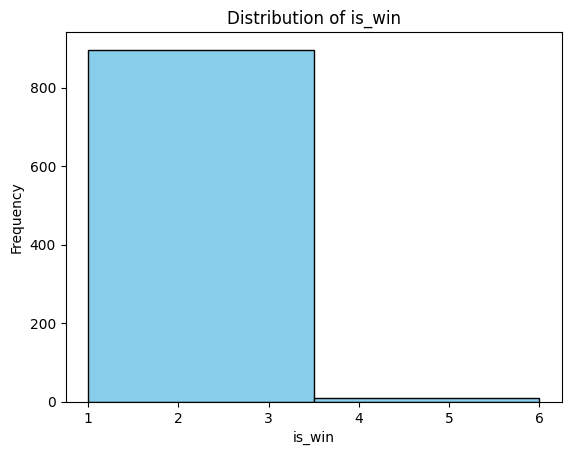

In [113]:
# 히스토그램 그리기
plt.hist(home_manager_win['is_win'], bins=2, color='skyblue', edgecolor='black')

# 그래프 제목 설정
plt.title('Distribution of is_win')

# x축 레이블 설정
plt.xlabel('is_win')

# y축 레이블 설정
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

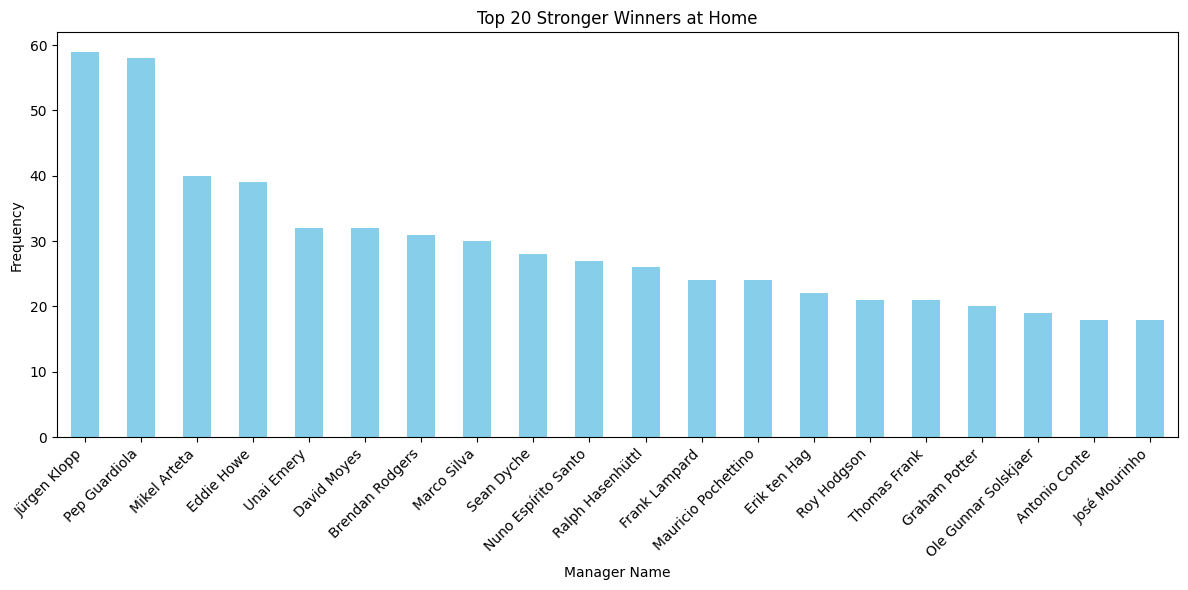

In [114]:
# 매니저 이름 빈도를 계산
home_manager_counts = home_manager_win['home_club_manager_name'].value_counts()

# 상위 20개의 매니저만 선택
top_20_managers = home_manager_counts.nlargest(20)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
top_20_managers.plot(kind='bar', color='skyblue')
plt.title('Top 20 Stronger Winners at Home')
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

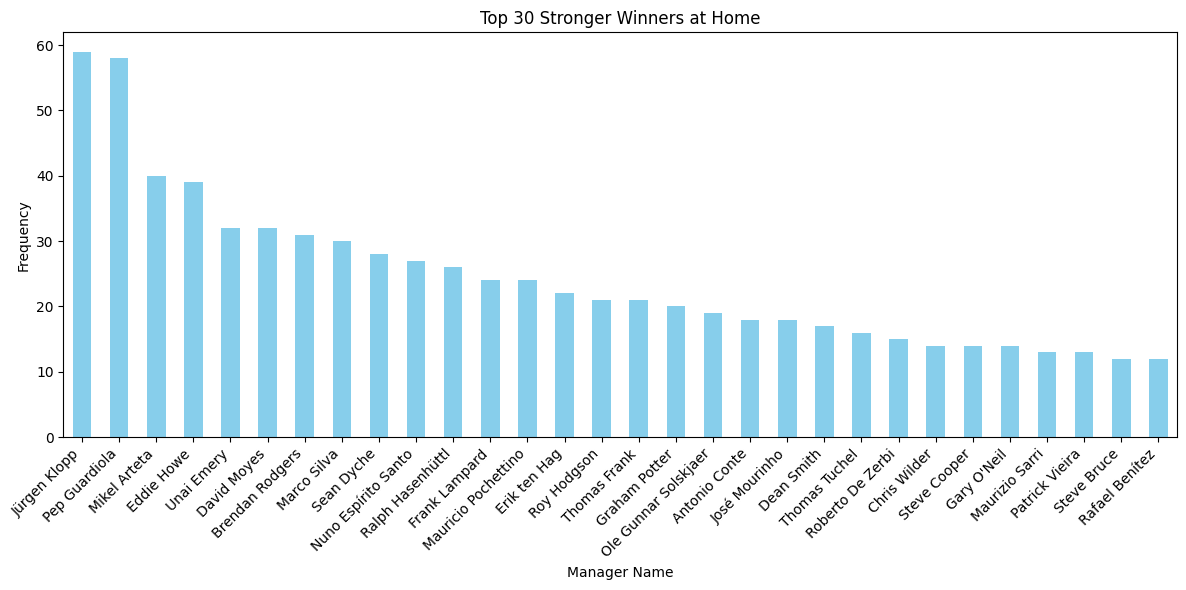

In [115]:
# 매니저 이름 빈도를 계산
home_manager_counts = home_manager_win['home_club_manager_name'].value_counts()

# 상위 20개의 매니저만 선택
top_30_managers = home_manager_counts.nlargest(30)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
top_30_managers.plot(kind='bar', color='skyblue')
plt.title('Top 30 Stronger Winners at Home')
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

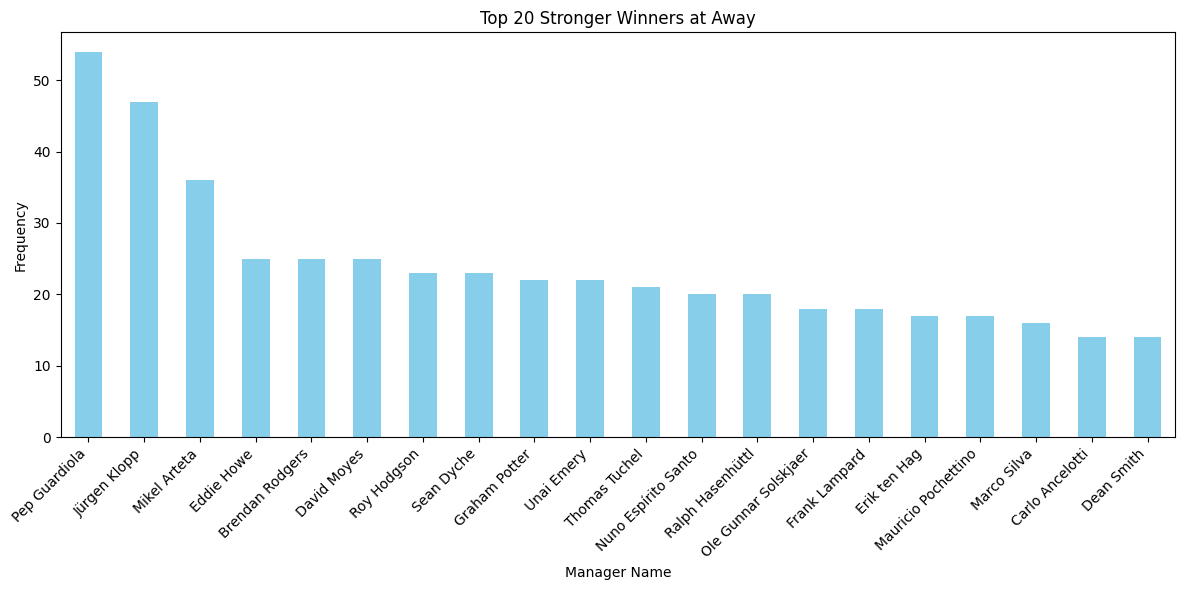

In [116]:
# 매니저 이름 빈도를 계산
away_manager_counts = away_manager_win['away_club_manager_name'].value_counts()

# 상위 20개의 매니저만 선택
top_20_managers_away = away_manager_counts.nlargest(20)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
top_20_managers_away.plot(kind='bar', color='skyblue')
plt.title('Top 20 Stronger Winners at Away')
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

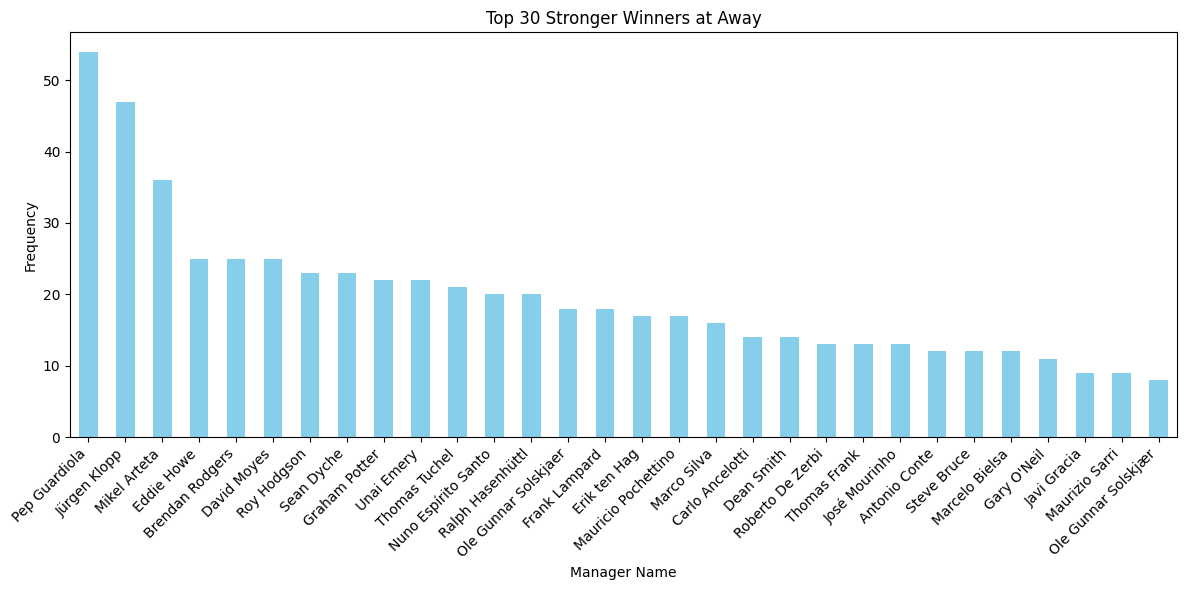

In [117]:
# 매니저 이름 빈도를 계산
away_manager_counts = away_manager_win['away_club_manager_name'].value_counts()

# 상위 20개의 매니저만 선택
top_30_managers_away = away_manager_counts.nlargest(30)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
top_30_managers_away.plot(kind='bar', color='skyblue')
plt.title('Top 30 Stronger Winners at Away')
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [118]:
# home_manager_counts와 away_manager_counts를 합칩니다.
merged_counts = pd.merge(home_manager_counts, away_manager_counts, left_index=True, right_index=True, suffixes=('_home', '_away')).reset_index()
merged_counts

,index,count_home,count_away
0,Jürgen Klopp,59,47
1,Pep Guardiola,58,54
2,Mikel Arteta,40,36
3,Eddie Howe,39,25
4,Unai Emery,32,22
...,...,...,...
56,Sam Allardyce,2,2
57,David Wagner,1,2
58,Slaven Bilic,1,1
59,Rubén Sellés,1,1


In [119]:
merged_counts.rename(columns={'index' : 'name'}, inplace=True)

In [120]:
merged_counts

,name,count_home,count_away
0,Jürgen Klopp,59,47
1,Pep Guardiola,58,54
2,Mikel Arteta,40,36
3,Eddie Howe,39,25
4,Unai Emery,32,22
...,...,...,...
56,Sam Allardyce,2,2
57,David Wagner,1,2
58,Slaven Bilic,1,1
59,Rubén Sellés,1,1


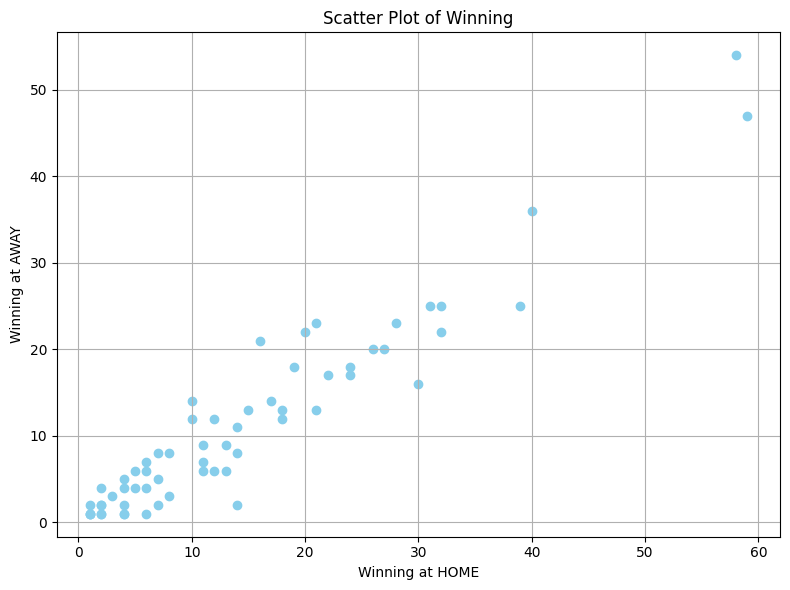

In [121]:
# 산점도 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.scatter(merged_counts['count_home'], merged_counts['count_away'], color='skyblue')
plt.title('Scatter Plot of Winning')
plt.xlabel('Winning at HOME')
plt.ylabel('Winning at AWAY')
plt.grid(True)

plt.tight_layout()
plt.show()

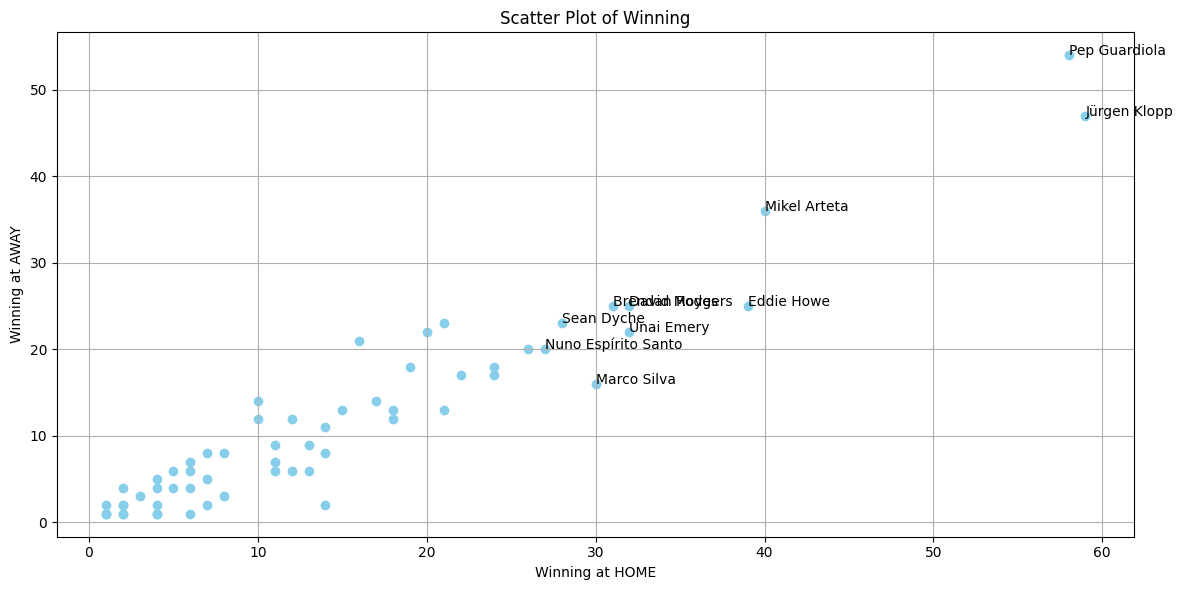

In [122]:
# 산점도 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.scatter(merged_counts['count_home'], merged_counts['count_away'], color='skyblue')
plt.title('Scatter Plot of Winning')
plt.xlabel('Winning at HOME')
plt.ylabel('Winning at AWAY')
plt.grid(True)

# 상위 10개의 데이터 포인트에 레이블 추가하기
top_names = merged_counts['name'].head(10)
for i, name in enumerate(top_names):
    plt.text(merged_counts.loc[i, 'count_home'], merged_counts.loc[i, 'count_away'], name, fontsize=10)

plt.tight_layout()
plt.show()

In [123]:
away_club_games_players

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name,player_id,name,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,player_club_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played
46813,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,65467,Vicente Iborra,Spain,Spain,1988-01-16,Defensive Midfield,Midfield,Olympiakos Syndesmos Filathlon Peiraios,10000000.0,2017-08-16,10000000,683,3050172_65467,1003,Vicente Iborra,0,0,0,0,10
46941,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,292417,Demarai Gray,England,Jamaica,1996-06-28,Left Winger,Attack,Everton Football Club,22000000.0,2017-08-16,10000000,29,3050172_292417,1003,Demarai Gray,0,0,0,0,90
46957,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,294057,James Maddison,England,England,1996-11-23,Attacking Midfield,Midfield,Tottenham Hotspur Football Club,70000000.0,2017-09-18,2000000,148,3050172_294057,1003,James Maddison,0,0,0,0,63
46773,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,10003,Wes Morgan,England,Jamaica,1984-01-21,Centre-Back,Defender,Leicester City,3500000.0,2018-01-02,3000000,1003,3050172_10003,1003,Wes Morgan,0,0,0,0,90
46782,3050172,2018-08-10,1003,1,13.0,Claude Puel,74439.0,Andre Marriner,4-4-2 double 6,985,2,7.0,José Mourinho,0,2018,Leicester City,Manchester United Football Club,16911,Kasper Schmeichel,Denmark,Denmark,1986-11-05,Goalkeeper,Goalkeeper,Royal Sporting Club Anderlecht,12000000.0,2018-01-02,10000000,58,3050172_16911,1003,Kasper Schmeichel,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453442,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,387626,Leon Bailey,Jamaica,Jamaica,1997-08-09,Left Winger,Attack,Aston Villa Football Club,45000000.0,2024-03-14,35000000,405,4095368_387626,405,Leon Bailey,0,0,0,0,90
453460,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,392085,Nicolò Zaniolo,Italy,Italy,1999-07-02,Attacking Midfield,Midfield,Aston Villa Football Club,55000000.0,2024-03-14,20000000,405,4095368_392085,405,Nicolò Zaniolo,1,0,1,0,27
453484,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,395516,Moussa Diaby,France,France,1999-07-07,Right Winger,Attack,Aston Villa Football Club,60000000.0,2024-03-14,55000000,405,4095368_395516,405,Moussa Diaby,0,0,0,1,45
453555,4095368,2024-03-17,405,1,4.0,Unai Emery,62461.0,Jarred Gillett,Starting Line-up: 4-4-2,379,1,7.0,David Moyes,0,2023,Aston Villa Football Club,West Ham United Football Club,447661,Douglas Luiz,Brazil,Brazil,1998-05-09,Central Midfield,Midfield,Aston Villa Football Club,70000000.0,2024-03-14,70000000,405,4095368_447661,405,Douglas Luiz,1,0,0,0,90


In [124]:
home_club_games_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496049 entries, 47267 to 453644
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   game_id                      496049 non-null  int64         
 1   date                         496049 non-null  datetime64[ns]
 2   home_club_id                 496049 non-null  int64         
 3   home_club_goals              496049 non-null  int64         
 4   home_club_position           496049 non-null  float64       
 5   home_club_manager_name       496049 non-null  object        
 6   attendance                   496049 non-null  float64       
 7   referee                      496049 non-null  object        
 8   home_club_formation          496049 non-null  object        
 9   opponent_id                  496049 non-null  int64         
 10  opponent_goals               496049 non-null  int64         
 11  opponent_position          

In [125]:
home_club_games_players.to_csv('home_club_games_players.csv', index=False)

In [126]:
away_club_games_players.to_csv('away_club_games_players.csv', index=False)

In [127]:
club_games

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
134837,3142950,681,0,NaN,Imanol Alguacil,150,0,NaN,Quique Setién,Away,0
134838,3148382,150,1,NaN,Quique Setién,714,1,NaN,Rubi,Away,0
134839,3153158,418,1,NaN,Santiago Solari,131,1,NaN,Ernesto Valverde,Away,0
134840,3307741,36661,1,NaN,Aleksandr Gorshkov,32218,2,NaN,Viktor Antikhovich,Away,0


In [128]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [129]:
home_club_games = home_club_games.groupby(['season','home_club_manager_name', 'home_club_name','opponent_name','is_win'])['game_id'].count().reset_index()
home_club_games

,season,home_club_manager_name,home_club_name,opponent_name,is_win,game_id
0,2018,Brendan Rodgers,Leicester City,Arsenal Football Club,1,1
1,2018,Brendan Rodgers,Leicester City,Association Football Club Bournemouth,1,1
2,2018,Brendan Rodgers,Leicester City,Chelsea Football Club,0,1
3,2018,Brendan Rodgers,Leicester City,Fulham Football Club,1,1
4,2018,Brendan Rodgers,Leicester City,Newcastle United Football Club,0,1
...,...,...,...,...,...,...
2340,2023,Vincent Kompany,Burnley Football Club,Manchester City Football Club,0,1
2341,2023,Vincent Kompany,Burnley Football Club,Manchester United Football Club,0,1
2342,2023,Vincent Kompany,Burnley Football Club,Sheffield United Football Club,1,1
2343,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,0,1


In [130]:
home_match = home_club_games.groupby(['season', 'home_club_manager_name', 'home_club_name', 'opponent_name']).agg({'game_id': 'count', 'is_win': 'sum'}).reset_index()
home_match

,season,home_club_manager_name,home_club_name,opponent_name,game_id,is_win
0,2018,Brendan Rodgers,Leicester City,Arsenal Football Club,1,1
1,2018,Brendan Rodgers,Leicester City,Association Football Club Bournemouth,1,1
2,2018,Brendan Rodgers,Leicester City,Chelsea Football Club,1,0
3,2018,Brendan Rodgers,Leicester City,Fulham Football Club,1,1
4,2018,Brendan Rodgers,Leicester City,Newcastle United Football Club,1,0
...,...,...,...,...,...,...
2293,2023,Vincent Kompany,Burnley Football Club,Manchester City Football Club,1,0
2294,2023,Vincent Kompany,Burnley Football Club,Manchester United Football Club,1,0
2295,2023,Vincent Kompany,Burnley Football Club,Sheffield United Football Club,1,1
2296,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,1,0


In [131]:
away_club_games = away_club_games.groupby(['season','away_club_manager_name', 'away_club_name','opponent_name','is_win'])['game_id'].count().reset_index()
away_club_games

,season,away_club_manager_name,away_club_name,opponent_name,is_win,game_id
0,2018,Aitor Karanka,Nottingham Forest Football Club,Chelsea Football Club,0,1
1,2018,Brendan Rodgers,Leicester City,Burnley Football Club,1,1
2,2018,Brendan Rodgers,Leicester City,Huddersfield Town,1,1
3,2018,Brendan Rodgers,Leicester City,Manchester City Football Club,0,1
4,2018,Brendan Rodgers,Leicester City,Watford FC,0,1
...,...,...,...,...,...,...
2347,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,0,1
2348,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,1,1
2349,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,0,1
2350,2023,Vincent Kompany,Burnley Football Club,West Ham United Football Club,0,1


In [132]:
away_match = away_club_games.groupby(['season', 'away_club_manager_name', 'away_club_name', 'opponent_name']).agg({'game_id': 'count', 'is_win': 'sum'}).reset_index()
away_match

,season,away_club_manager_name,away_club_name,opponent_name,game_id,is_win
0,2018,Aitor Karanka,Nottingham Forest Football Club,Chelsea Football Club,1,0
1,2018,Brendan Rodgers,Leicester City,Burnley Football Club,1,1
2,2018,Brendan Rodgers,Leicester City,Huddersfield Town,1,1
3,2018,Brendan Rodgers,Leicester City,Manchester City Football Club,1,0
4,2018,Brendan Rodgers,Leicester City,Watford FC,1,0
...,...,...,...,...,...,...
2297,2023,Vincent Kompany,Burnley Football Club,Newcastle United Football Club,1,0
2298,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,2,1
2299,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,1,0
2300,2023,Vincent Kompany,Burnley Football Club,West Ham United Football Club,1,0


In [133]:
home_match['is_win'] / home_match['game_id'] * 100

0       100.0
1       100.0
2         0.0
3       100.0
4         0.0
        ...  
2293      0.0
2294      0.0
2295    100.0
2296      0.0
2297      0.0
Length: 2298, dtype: float64

In [134]:
home_match['win_percentage'] = home_match['is_win'] / home_match['game_id'] * 100
home_match

,season,home_club_manager_name,home_club_name,opponent_name,game_id,is_win,win_percentage
0,2018,Brendan Rodgers,Leicester City,Arsenal Football Club,1,1,100.0
1,2018,Brendan Rodgers,Leicester City,Association Football Club Bournemouth,1,1,100.0
2,2018,Brendan Rodgers,Leicester City,Chelsea Football Club,1,0,0.0
3,2018,Brendan Rodgers,Leicester City,Fulham Football Club,1,1,100.0
4,2018,Brendan Rodgers,Leicester City,Newcastle United Football Club,1,0,0.0
...,...,...,...,...,...,...,...
2293,2023,Vincent Kompany,Burnley Football Club,Manchester City Football Club,1,0,0.0
2294,2023,Vincent Kompany,Burnley Football Club,Manchester United Football Club,1,0,0.0
2295,2023,Vincent Kompany,Burnley Football Club,Sheffield United Football Club,1,1,100.0
2296,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,1,0,0.0


In [135]:
away_match['win_percentage'] = away_match['is_win'] / away_match['game_id'] * 100
away_match

,season,away_club_manager_name,away_club_name,opponent_name,game_id,is_win,win_percentage
0,2018,Aitor Karanka,Nottingham Forest Football Club,Chelsea Football Club,1,0,0.0
1,2018,Brendan Rodgers,Leicester City,Burnley Football Club,1,1,100.0
2,2018,Brendan Rodgers,Leicester City,Huddersfield Town,1,1,100.0
3,2018,Brendan Rodgers,Leicester City,Manchester City Football Club,1,0,0.0
4,2018,Brendan Rodgers,Leicester City,Watford FC,1,0,0.0
...,...,...,...,...,...,...,...
2297,2023,Vincent Kompany,Burnley Football Club,Newcastle United Football Club,1,0,0.0
2298,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,2,1,50.0
2299,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,1,0,0.0
2300,2023,Vincent Kompany,Burnley Football Club,West Ham United Football Club,1,0,0.0


In [136]:
home_match.sort_values(by='is_win', ascending=False)

,season,home_club_manager_name,home_club_name,opponent_name,game_id,is_win,win_percentage
0,2018,Brendan Rodgers,Leicester City,Arsenal Football Club,1,1,100.0
1821,2022,Mikel Arteta,Arsenal Football Club,Wolverhampton Wanderers Football Club,1,1,100.0
904,2020,Graham Potter,Brighton and Hove Albion Football Club,Newcastle United Football Club,1,1,100.0
902,2020,Graham Potter,Brighton and Hove Albion Football Club,Manchester City Football Club,1,1,100.0
1815,2022,Mikel Arteta,Arsenal Football Club,Manchester United Football Club,1,1,100.0
...,...,...,...,...,...,...,...
997,2020,Nuno Espírito Santo,Wolverhampton Wanderers Football Club,Leicester City,1,0,0.0
994,2020,Nuno Espírito Santo,Wolverhampton Wanderers Football Club,Everton Football Club,1,0,0.0
991,2020,Nuno Espírito Santo,Wolverhampton Wanderers Football Club,Burnley Football Club,1,0,0.0
989,2020,Nuno Espírito Santo,Wolverhampton Wanderers Football Club,Aston Villa Football Club,1,0,0.0


In [137]:
away_match.sort_values(by='is_win', ascending=False)

,season,away_club_manager_name,away_club_name,opponent_name,game_id,is_win,win_percentage
1404,2021,Nuno Espírito Santo,Tottenham Hotspur Football Club,Newcastle United Football Club,1,1,100.0
1117,2020,Scott Parker,Fulham Football Club,Liverpool Football Club,1,1,100.0
1886,2022,Roberto De Zerbi,Brighton and Hove Albion Football Club,Stoke City,1,1,100.0
1885,2022,Roberto De Zerbi,Brighton and Hove Albion Football Club,Southampton FC,1,1,100.0
1589,2022,Antonio Conte,Tottenham Hotspur Football Club,Crystal Palace Football Club,1,1,100.0
...,...,...,...,...,...,...,...
915,2020,José Mourinho,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club,1,0,0.0
913,2020,José Mourinho,Tottenham Hotspur Football Club,Arsenal Football Club,1,0,0.0
911,2020,Graham Potter,Brighton and Hove Albion Football Club,Wolverhampton Wanderers Football Club,1,0,0.0
910,2020,Graham Potter,Brighton and Hove Albion Football Club,West Ham United Football Club,1,0,0.0


In [138]:
home_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  2298 non-null   int64  
 1   home_club_manager_name  2298 non-null   object 
 2   home_club_name          2298 non-null   object 
 3   opponent_name           2298 non-null   object 
 4   game_id                 2298 non-null   int64  
 5   is_win                  2298 non-null   int64  
 6   win_percentage          2298 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 125.8+ KB


In [139]:
away_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  2302 non-null   int64  
 1   away_club_manager_name  2302 non-null   object 
 2   away_club_name          2302 non-null   object 
 3   opponent_name           2302 non-null   object 
 4   game_id                 2302 non-null   int64  
 5   is_win                  2302 non-null   int64  
 6   win_percentage          2302 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 126.0+ KB


In [140]:
home_win_count = home_match.groupby(['home_club_manager_name', 'opponent_name'])['is_win'].sum()
home_win_count.sort_values(ascending=False)

home_club_manager_name  opponent_name                         
Pep Guardiola           Brighton and Hove Albion Football Club    6
                        Fulham Football Club                      6
                        Newcastle United Football Club            6
                        Burnley Football Club                     6
Jürgen Klopp            Southampton FC                            6
                                                                 ..
Dean Smith              Manchester United Football Club           0
Patrick Vieira          West Ham United Football Club             0
Dean Smith              Manchester City Football Club             0
Paul Heckingbottom      Arsenal Football Club                     0
Xisco Muñoz             Wolverhampton Wanderers Football Club     0
Name: is_win, Length: 1218, dtype: int64

In [141]:
home_game_counts = home_match.groupby(['home_club_manager_name', 'opponent_name'])['game_id'].count()
home_game_counts.sort_values(ascending=False)

home_club_manager_name  opponent_name                        
Jürgen Klopp            Newcastle United Football Club           6
                        Manchester City Football Club            6
                        Everton Football Club                    6
                        Chelsea Football Club                    6
Sean Dyche              Tottenham Hotspur Football Club          6
                                                                ..
Marcelo Bielsa          Sheffield United Football Club           1
                        Southampton FC                           1
                        Watford FC                               1
                        West Bromwich Albion                     1
Xisco Muñoz             Wolverhampton Wanderers Football Club    1
Name: game_id, Length: 1218, dtype: int64

In [142]:
home_win_percentages = home_win_count / home_game_counts
home_win_percentages.sort_values(ascending=False)

home_club_manager_name  opponent_name                        
Aaron Danks             Brentford Football Club                  1.0
Maurizio Sarri          Huddersfield Town                        1.0
Mauricio Pochettino     Burnley Football Club                    1.0
                        Cardiff City                             1.0
                        Chelsea Football Club                    1.0
                                                                ... 
Neil Warnock            Huddersfield Town                        0.0
                        Leicester City                           0.0
                        Liverpool Football Club                  0.0
                        Manchester City Football Club            0.0
Xisco Muñoz             Wolverhampton Wanderers Football Club    0.0
Length: 1218, dtype: float64

In [143]:
away_win_count = away_match.groupby(['away_club_manager_name', 'opponent_name'])['is_win'].sum()
away_win_count.sort_values(ascending=False)

away_club_manager_name  opponent_name                         
Jürgen Klopp            Wolverhampton Wanderers Football Club     6
Pep Guardiola           Everton Football Club                     6
Jürgen Klopp            Newcastle United Football Club            5
Pep Guardiola           Burnley Football Club                     5
Jürgen Klopp            Crystal Palace Football Club              5
                                                                 ..
Marcelo Bielsa          Arsenal Football Club                     0
                        Brighton and Hove Albion Football Club    0
                        Chelsea Football Club                     0
                        Crystal Palace Football Club              0
Xisco Muñoz             Tottenham Hotspur Football Club           0
Name: is_win, Length: 1232, dtype: int64

In [144]:
away_game_counts = away_match.groupby(['away_club_manager_name', 'opponent_name'])['game_id'].count()
away_game_counts.sort_values(ascending=False)

away_club_manager_name  opponent_name                         
Sean Dyche              Wolverhampton Wanderers Football Club     6
                        Brighton and Hove Albion Football Club    6
Pep Guardiola           West Ham United Football Club             6
Jürgen Klopp            Manchester City Football Club             6
Sean Dyche              Liverpool Football Club                   6
                                                                 ..
Manuel Pellegrini       Manchester City Football Club             1
                        Manchester United Football Club           1
                        Newcastle United Football Club            1
                        Tottenham Hotspur Football Club           1
Xisco Muñoz             Tottenham Hotspur Football Club           1
Name: game_id, Length: 1232, dtype: int64

In [145]:
away_win_percentages = away_win_count / away_game_counts
away_win_percentages.sort_values(ascending=False)

away_club_manager_name  opponent_name                         
Slaven Bilic            West Ham United Football Club             1.0
Javi Gracia             Burnley Football Club                     1.0
Freddie Ljungberg       West Ham United Football Club             1.0
Frank Lampard           Norwich City                              1.0
Nigel Pearson           Association Football Club Bournemouth     1.0
                                                                 ... 
Marcelo Bielsa          Arsenal Football Club                     0.0
                        Brighton and Hove Albion Football Club    0.0
                        Chelsea Football Club                     0.0
                        Crystal Palace Football Club              0.0
Xisco Muñoz             Tottenham Hotspur Football Club           0.0
Length: 1232, dtype: float64

In [146]:
home_club_games

,season,home_club_manager_name,home_club_name,opponent_name,is_win,game_id
0,2018,Brendan Rodgers,Leicester City,Arsenal Football Club,1,1
1,2018,Brendan Rodgers,Leicester City,Association Football Club Bournemouth,1,1
2,2018,Brendan Rodgers,Leicester City,Chelsea Football Club,0,1
3,2018,Brendan Rodgers,Leicester City,Fulham Football Club,1,1
4,2018,Brendan Rodgers,Leicester City,Newcastle United Football Club,0,1
...,...,...,...,...,...,...
2340,2023,Vincent Kompany,Burnley Football Club,Manchester City Football Club,0,1
2341,2023,Vincent Kompany,Burnley Football Club,Manchester United Football Club,0,1
2342,2023,Vincent Kompany,Burnley Football Club,Sheffield United Football Club,1,1
2343,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,0,1


In [147]:
# 감독 별 승리 횟수를 계산합니다.
win_count = home_club_games.groupby('home_club_manager_name')['is_win'].sum()

# 감독 별 게임 횟수를 계산합니다.
game_counts = home_club_games.groupby('home_club_manager_name')['game_id'].count()

# 승률을 계산합니다.
win_percentages = win_count / game_counts

print(win_percentages)

home_club_manager_name
Aaron Danks           1.000000
Adam Sadler           0.000000
Albert Stuivenberg    0.000000
Alex Neil             0.500000
Andoni Iraola         0.352941
                        ...   
Tony Mowbray          0.000000
Unai Emery            0.642857
Valérien Ismaël       0.000000
Vincent Kompany       0.133333
Xisco Muñoz           0.333333
Length: 103, dtype: float64


In [148]:
away_club_games

,season,away_club_manager_name,away_club_name,opponent_name,is_win,game_id
0,2018,Aitor Karanka,Nottingham Forest Football Club,Chelsea Football Club,0,1
1,2018,Brendan Rodgers,Leicester City,Burnley Football Club,1,1
2,2018,Brendan Rodgers,Leicester City,Huddersfield Town,1,1
3,2018,Brendan Rodgers,Leicester City,Manchester City Football Club,0,1
4,2018,Brendan Rodgers,Leicester City,Watford FC,0,1
...,...,...,...,...,...,...
2347,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,0,1
2348,2023,Vincent Kompany,Burnley Football Club,Nottingham Forest Football Club,1,1
2349,2023,Vincent Kompany,Burnley Football Club,Tottenham Hotspur Football Club,0,1
2350,2023,Vincent Kompany,Burnley Football Club,West Ham United Football Club,0,1


In [149]:
# 감독 별 승리 횟수를 계산합니다.
away_win_count = away_club_games.groupby('away_club_manager_name')['is_win'].sum()

# 감독 별 게임 횟수를 계산합니다.
away_game_counts = away_club_games.groupby('away_club_manager_name')['game_id'].count()

# 승률을 계산합니다.
away_win_percentages = away_win_count / away_game_counts

print(away_win_percentages)

away_club_manager_name
Aaron Danks         0.000000
Aitor Karanka       0.000000
Alex Neil           0.000000
Andoni Iraola       0.437500
Ange Postecoglou    0.428571
                      ...   
Unai Emery          0.407407
Valérien Ismaël     0.000000
Veljko Paunovic     0.000000
Vincent Kompany     0.200000
Xisco Muñoz         0.200000
Length: 103, dtype: float64


In [150]:
# 감독 별로 승리 횟수의 총합 계산
win_count_total = home_club_games.groupby('home_club_manager_name')['is_win'].sum()

# 감독 별로 게임 횟수의 총합 계산
game_count_total = home_club_games.groupby('home_club_manager_name')['game_id'].count()

# 감독 별로 승률 계산
win_percentage = win_count_total / game_count_total

# 새로운 데이터프레임 생성
manager_stats = pd.DataFrame({
    'is_win_total': win_count_total,
    'game_id_count_total': game_count_total,
    'win_percentage': win_percentage
})

manager_stats_sorted = manager_stats.sort_values(by=['is_win_total', 'game_id_count_total'], ascending=False)
manager_stats_sorted

,is_win_total,game_id_count_total,win_percentage
home_club_manager_name,,,
Pep Guardiola,93,114,0.815789
Jürgen Klopp,89,116,0.767241
Mikel Arteta,56,84,0.666667
Eddie Howe,46,90,0.511111
David Moyes,39,85,0.458824
...,...,...,...
Michael Skubala,0,1,0.000000
Neil Harris,0,1,0.000000
Shaun Maloney,0,1,0.000000


<Figure size 640x480 with 0 Axes>

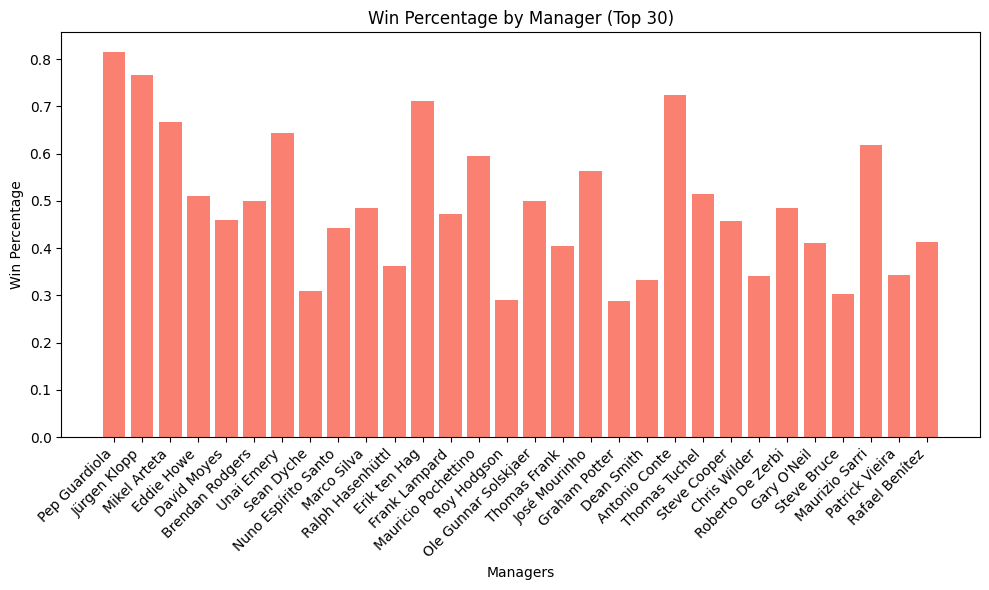

In [151]:
# 각 통계 항목에 대한 그래프를 그리기 위해 데이터를 추출합니다.
managers = manager_stats_sorted.index
win_percentage = manager_stats_sorted['win_percentage']

# 그래프를 화면에 출력합니다.
plt.tight_layout()
plt.show()

# 처음 30개의 감독 데이터만 선택합니다.
managers_top30 = managers[:30]
win_percentage_top30 = win_percentage[:30]

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(managers_top30, win_percentage_top30, color='salmon')
plt.title('Win Percentage by Manager (Top 30)')
plt.xlabel('Managers')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬
plt.tight_layout()
plt.show()

In [152]:
# 감독 별 승리 횟수를 계산합니다.
away_win_count_total = away_club_games.groupby('away_club_manager_name')['is_win'].sum()

# 감독 별 게임 횟수를 계산합니다.
away_game_counts_total = away_club_games.groupby('away_club_manager_name')['game_id'].count()

# 승률을 계산합니다.
away_win_percentages = away_win_count / away_game_counts

# 새로운 데이터프레임 생성
away_manager_stats = pd.DataFrame({
    'is_win_total': away_win_count_total,
    'game_id_count_total': away_game_counts_total,
    'win_percentage': away_win_percentages
})

away_manager_stats_sorted = away_manager_stats.sort_values(by=['is_win_total', 'game_id_count_total'], ascending=False)
away_manager_stats_sorted

,is_win_total,game_id_count_total,win_percentage
away_club_manager_name,,,
Pep Guardiola,80,122,0.655738
Jürgen Klopp,71,122,0.581967
Mikel Arteta,44,86,0.511628
Brendan Rodgers,32,83,0.385542
Eddie Howe,28,87,0.321839
...,...,...,...
Slaven Bilić,0,1,0.000000
Steve Morison,0,1,0.000000
Tony Mowbray,0,1,0.000000


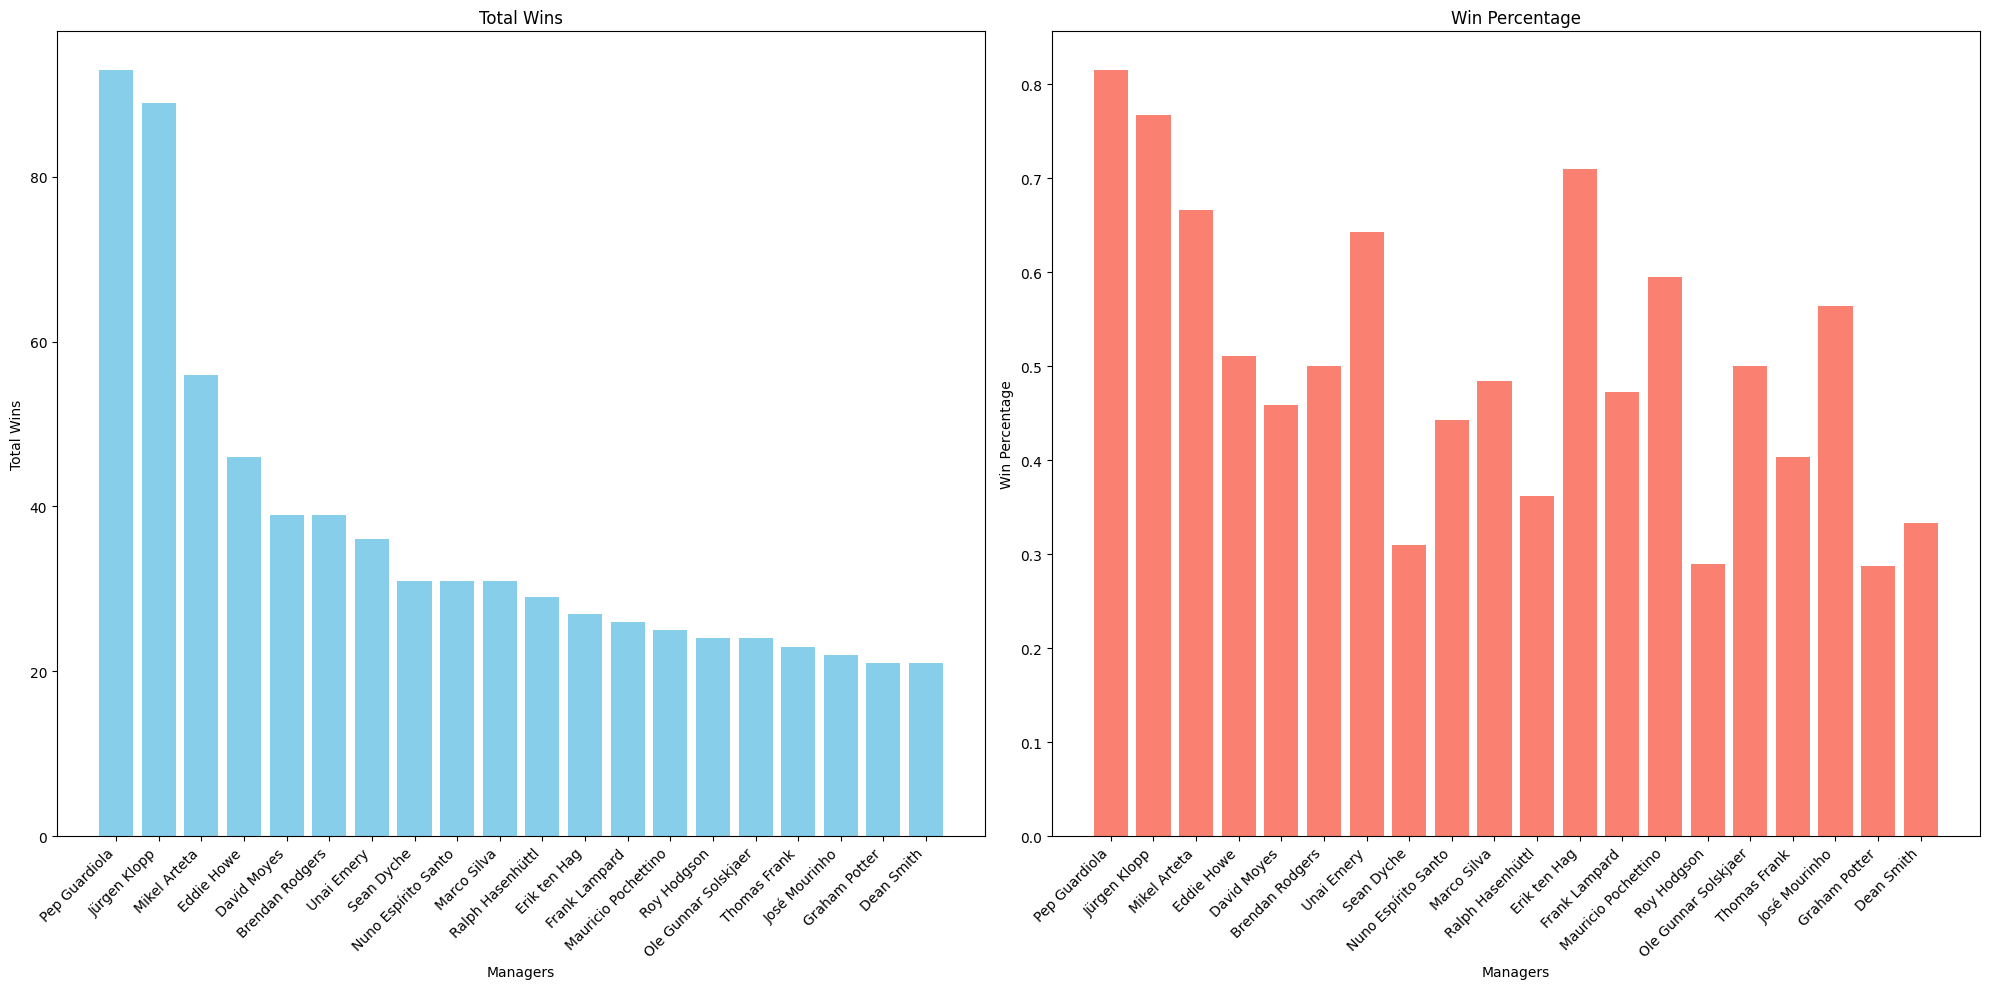

In [153]:
# 상위 20명의 데이터를 선택합니다.
top20_managers = manager_stats_sorted.head(20)

# 상위 30명의 감독과 각 통계 항목을 추출합니다.
top20_managers_names = top20_managers.index
top20_is_win_total = top20_managers['is_win_total']
top20_game_id_count_total = top20_managers['game_id_count_total']
top20_win_percentage = top20_managers['win_percentage']

# 그래프를 그립니다.
plt.figure(figsize=(20, 10))

# 감독 별 승리 횟수의 총합에 대한 막대 그래프
plt.subplot(1, 2, 1)
plt.bar(top20_managers_names, top20_is_win_total, color='skyblue')
plt.title('Total Wins')
plt.xlabel('Managers')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬

# 감독 별 승률에 대한 막대 그래프
plt.subplot(1, 2, 2)
plt.bar(top20_managers_names, top20_win_percentage, color='salmon')
plt.title('Win Percentage')
plt.xlabel('Managers')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬

# 그래프를 화면에 출력합니다.
plt.tight_layout()
plt.show()

In [154]:
away_manager_stats_sorted

,is_win_total,game_id_count_total,win_percentage
away_club_manager_name,,,
Pep Guardiola,80,122,0.655738
Jürgen Klopp,71,122,0.581967
Mikel Arteta,44,86,0.511628
Brendan Rodgers,32,83,0.385542
Eddie Howe,28,87,0.321839
...,...,...,...
Slaven Bilić,0,1,0.000000
Steve Morison,0,1,0.000000
Tony Mowbray,0,1,0.000000


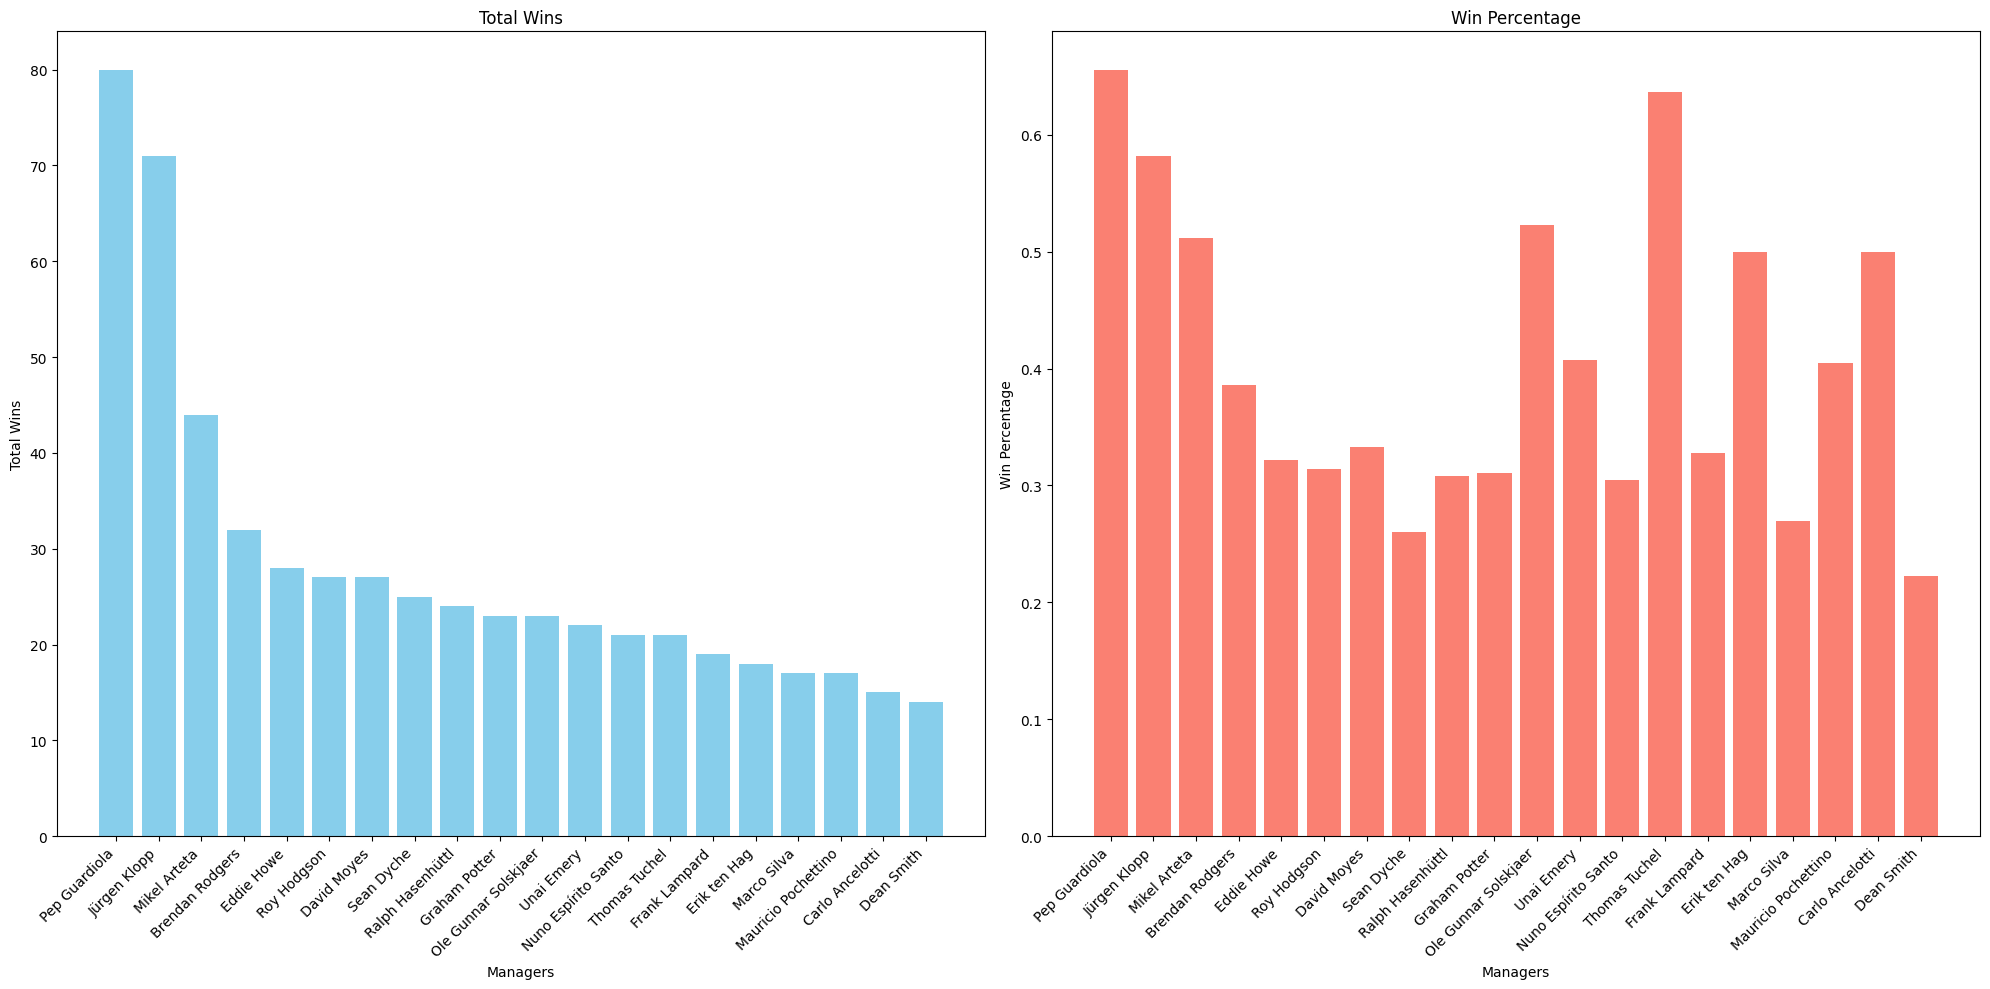

In [155]:
# 상위 20명의 데이터를 선택합니다.
away_top20_managers = away_manager_stats_sorted.head(20)

# 상위 20명의 감독과 각 통계 항목을 추출합니다.
away_top20_managers_names = away_top20_managers.index
away_top20_is_win_total = away_top20_managers['is_win_total']
away_top20_game_id_count_total = away_top20_managers['game_id_count_total']
away_top20_win_percentage = away_top20_managers['win_percentage']

# 그래프를 그립니다.
plt.figure(figsize=(20, 10))

# 감독 별 승리 횟수의 총합에 대한 막대 그래프
plt.subplot(1, 2, 1)
plt.bar(away_top20_managers_names, away_top20_is_win_total, color='skyblue')
plt.title('Total Wins')
plt.xlabel('Managers')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬

# 감독 별 승률에 대한 막대 그래프
plt.subplot(1, 2, 2)
plt.bar(away_top20_managers_names, away_top20_win_percentage, color='salmon')
plt.title('Win Percentage')
plt.xlabel('Managers')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬

# 그래프를 화면에 출력합니다.
plt.tight_layout()
plt.show()

In [156]:
# country_of_citizenship 칼럼에서 각 국가의 빈도수를 세어줍니다.
country_counts = players['country_of_citizenship'].value_counts()

# 전체 인원수
total_players = country_counts.sum()

# 각 국가별 인원수를 전체 인원수로 나누어 비율로 계산합니다.
country_ratios = country_counts / total_players
country_ratios

country_of_citizenship
Spain             0.060595
Italy             0.059960
France            0.054980
Brazil            0.050501
Turkey            0.050234
                    ...   
Réunion           0.000033
India             0.000033
Malawi            0.000033
Seychelles        0.000033
Southern Sudan    0.000033
Name: count, Length: 182, dtype: float64

In [157]:
players

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur
0,10,Miroslav Klose,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,IT1,Società Sportiva Lazio S.p.A.,30000000.0
1,26,Roman Weidenfeller,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,L1,Borussia Dortmund,8000000.0
2,65,Dimitar Berbatov,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,34500000.0
3,77,Lúcio,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,IT1,Juventus Football Club,24500000.0
4,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf Yılmaz,yusuf-yilmaz,Türkiye,Türkiye,2006-04-29,Goalkeeper,Goalkeeper,right,193.0,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0
30495,1214946,Sid Ahmed Aissaoui,sid-ahmed-aissaoui,Algeria,Algeria,2005-01-11,Central Midfield,Midfield,right,183.0,RU1,PFK CSKA Moskva,150000.0
30496,1225269,Erdem Çalık,erdem-calik,Türkiye,Türkiye,2006-06-05,Central Midfield,Midfield,right,NaN,TR1,Pendikspor,50000.0
30497,1229924,Adama Sidibeh,adama-sidibeh,NaN,The Gambia,1998-06-25,Centre-Forward,Attack,NaN,NaN,SC1,Saint Johnstone Football Club,NaN


In [158]:
# 이름 칼럼에서 중복을 제외한 고유한 값의 개수 확인
unique_names_count = players['player_code'].nunique()

if unique_names_count < len(players):
    print("중복된 이름이 있습니다.")
else:
    print("중복된 이름이 없습니다.")

중복된 이름이 있습니다.


In [159]:
# 중복된 이름을 가진 행들을 추출합니다.
duplicate_names = players[players.duplicated(subset='player_code', keep=False)]

# 중복된 이름을 가진 행들을 출력합니다.
duplicate_names

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur
3,77,Lúcio,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,IT1,Juventus Football Club,24500000.0
78,1606,Morten Rasmussen,morten-rasmussen,Denmark,Denmark,1985-03-26,Centre-Back,Defender,right,188.0,DK1,AC Horsens,600000.0
153,3165,Cris,cris,Brazil,Brazil,1977-06-03,Centre-Back,Defender,right,183.0,TR1,Galatasaray Spor Kulübü,15000000.0
192,3366,Kaká,kaka,Brazil,Brazil,1982-04-22,Attacking Midfield,Midfield,both,186.0,IT1,Associazione Calcio Milan,70000000.0
210,3473,Thomas Sörensen,thomas-sorensen,Denmark,Denmark,1976-06-12,Goalkeeper,Goalkeeper,right,196.0,GB1,Stoke City,6500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30320,1062473,Oguzhan Yilmaz,oguzhan-yilmaz,Turkey,Turkey,2006-07-02,Right-Back,Defender,right,178.0,TR1,Trabzonspor Kulübü,50000.0
30376,1086381,Erick,erick,Brazil,Brazil,2004-02-29,Defensive Midfield,Midfield,right,176.0,BE1,Cercle Brugge Koninklijke Sportvereniging,NaN
30384,1095318,Carlão,carlao,NaN,Brazil,2003-08-19,Centre-Back,Defender,NaN,NaN,PO1,Moreirense Futebol Clube,100000.0
30385,1095655,Italo,italo,Brazil,Brazil,2004-05-04,Centre-Forward,Attack,right,175.0,UKR1,LNZ Cherkasy,50000.0


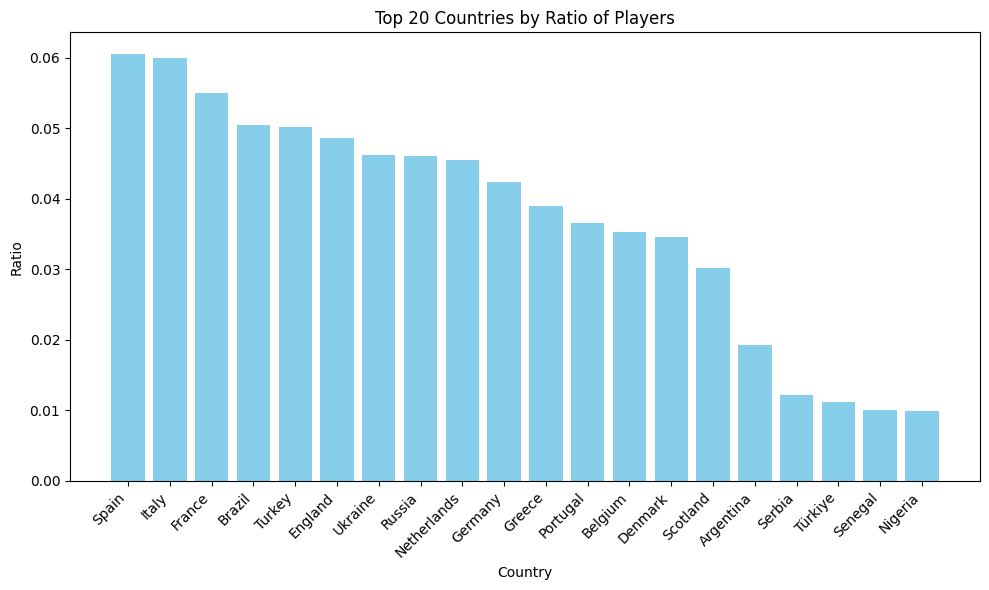

In [160]:
# 비율이 높은 상위 20개 국가만 선택
top_countries = country_ratios.head(20)

# 그래프를 그리기 위한 데이터 추출
countries = top_countries.index
ratios = top_countries.values

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(countries, ratios, color='skyblue')
plt.title('Top 20 Countries by Ratio of Players')
plt.xlabel('Country')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬
plt.tight_layout()

# 그래프 출력
plt.show()

In [161]:
appearances

,appearance_id,game_id,player_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,GB1,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,GB1,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,GB1,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,GB1,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,GB1,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,GB1,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,GB1,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,GB1,0,0,0,0,45


In [162]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61403 entries, 785591 to 1555970
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appearance_id     61403 non-null  object
 1   game_id           61403 non-null  int64 
 2   player_id         61403 non-null  int64 
 3   player_club_id    61403 non-null  int64 
 4   appearances_date  61403 non-null  object
 5   player_name       61403 non-null  object
 6   competition_id    61403 non-null  object
 7   yellow_cards      61403 non-null  int64 
 8   red_cards         61403 non-null  int64 
 9   goals             61403 non-null  int64 
 10  assists           61403 non-null  int64 
 11  minutes_played    61403 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 6.1+ MB


In [163]:
appearances['appearances_date'] = pd.to_datetime(appearances['appearances_date'])

In [164]:
# season 함수 정의
def get_season(appearances_date):
    if pd.Timestamp('2018-08-10') <= appearances_date <= pd.Timestamp('2019-05-12'):
        return '1819'
    elif pd.Timestamp('2019-08-09') <= appearances_date <= pd.Timestamp('2020-07-26'):
        return '1920'
    elif pd.Timestamp('2020-09-12') <= appearances_date <= pd.Timestamp('2021-05-23'):
        return '2021'
    elif pd.Timestamp('2021-08-13') <= appearances_date <= pd.Timestamp('2022-05-22'):
        return '2122'
    elif pd.Timestamp('2022-08-05') <= appearances_date <= pd.Timestamp('2023-05-28'):
        return '2223'
    elif pd.Timestamp('2023-08-11') <= appearances_date <= pd.Timestamp('2024-05-19'):
        return '2324'
    else:
        return None
    
# date를 기반으로 season 칼럼 생성
appearances['season'] = appearances['appearances_date'].apply(get_season)

In [165]:
appearances

,appearance_id,game_id,player_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,GB1,0,0,0,0,90,1819
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,GB1,0,0,0,0,27,1819
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,GB1,0,0,1,0,84,1819
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,GB1,0,0,0,0,90,1819
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,GB1,0,0,0,0,90,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,GB1,0,0,0,0,24,2324
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,GB1,0,0,0,0,63,2324
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,GB1,1,0,0,0,90,2324
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,GB1,0,0,0,0,45,2324


In [166]:
top5_assists_players = appearances.groupby(['season', 'player_name'])['assists'].sum()

In [167]:
top5_assists_players_df = top5_assists_players.groupby('season', group_keys=False).apply(lambda x: x.nlargest(5))
top5_assists_players_df

season  player_name           
1819    Eden Hazard               15
        Ryan Fraser               14
        Christian Eriksen         12
        Trent Alexander-Arnold    12
        Andrew Robertson          11
1920    Kevin De Bruyne           20
        Trent Alexander-Arnold    13
        Andrew Robertson          12
        Riyad Mahrez              12
        Heung-min Son             11
2021    Harry Kane                14
        Jack Grealish             12
        Kevin De Bruyne           12
        Timo Werner               12
        Bruno Fernandes           11
2122    Mohamed Salah             14
        Jarrod Bowen              12
        Trent Alexander-Arnold    12
        Andrew Robertson          10
        Harvey Barnes             10
2223    Kevin De Bruyne           18
        Leandro Trossard          13
        Mohamed Salah             12
        Bukayo Saka               11
        Michael Olise             11
2324    Kieran Trippier           10
       

In [168]:
df = clubs.sort_values(by='squad_size', ascending=False)
df

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
141,1110,Huddersfield Town,33,26.7,12,36.4,3,2018
195,1032,Reading FC,30,23.1,14,46.7,5,2012
171,1148,Brentford Football Club,30,25.6,23,76.7,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
392,631,Chelsea Football Club,30,23.6,19,63.3,17,2023
373,180,Southampton FC,29,24.5,20,69.0,13,2022
354,350,Sheffield United Football Club,29,25.9,17,58.6,9,2023
244,1132,Burnley Football Club,29,25.2,22,75.9,11,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [169]:
df = df[df['last_season'] == 2023]
df

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
171,1148,Brentford Football Club,30,25.6,23,76.7,18,2023
392,631,Chelsea Football Club,30,23.6,19,63.3,17,2023
354,350,Sheffield United Football Club,29,25.9,17,58.6,9,2023
244,1132,Burnley Football Club,29,25.2,22,75.9,11,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023
166,762,Newcastle United Football Club,28,27.5,13,46.4,12,2023
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
194,873,Crystal Palace Football Club,28,26.3,13,46.4,9,2023
242,985,Manchester United Football Club,27,26.4,19,70.4,20,2023


C:\Users\parks\AppData\Local\Temp\ipykernel_23100\1955588238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='name', x='squad_size', palette='Set3')


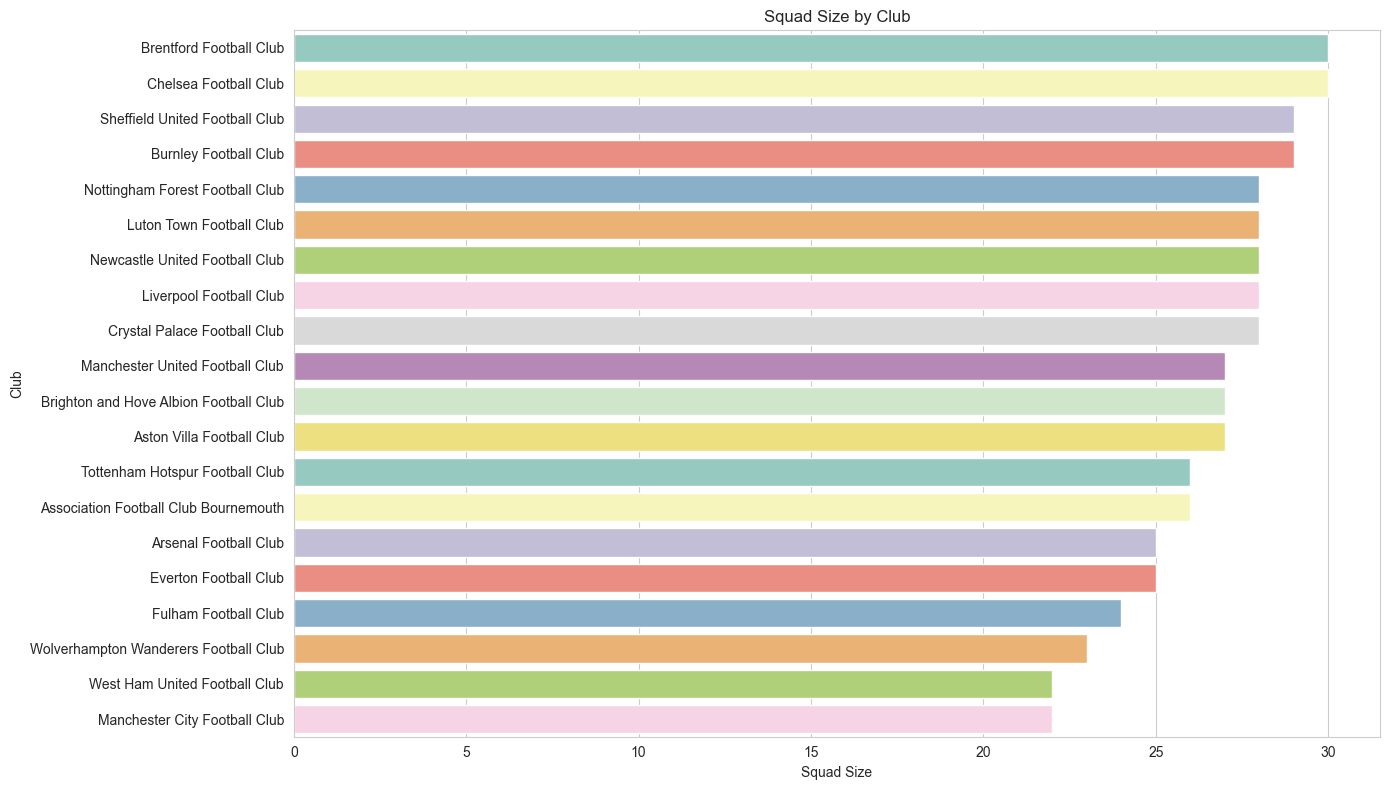

In [170]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=df, y='name', x='squad_size', palette='Set3')
plt.xlabel('Squad Size')
plt.ylabel('Club')
plt.title('Squad Size by Club')
plt.tight_layout()
plt.show()

In [171]:
df_players

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id,appearance_id,game_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050167_2865,3050167,11,2018-08-12,Stephan Lichtsteiner,GB1,0,0,0,0,55
1,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050247_2865,3050247,11,2018-10-22,Stephan Lichtsteiner,GB1,0,0,0,0,61
2,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050259_2865,3050259,11,2018-10-28,Stephan Lichtsteiner,GB1,1,0,0,0,45
3,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3056407_2865,3056407,11,2018-12-05,Stephan Lichtsteiner,GB1,0,0,0,0,54
4,2865,Stephan Lichtsteiner,stephan-lichtsteiner,Switzerland,Switzerland,1984-01-16,Right-Back,Defender,right,182.0,L1,FC Augsburg 1907,17000000.0,2017-12-29,2000000,167,3050317_2865,3050317,11,2018-12-08,Stephan Lichtsteiner,GB1,1,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991825,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,GB1,Nottingham Forest Football Club,25000000.0,2024-03-14,25000000,703,4095353_1005649,4095353,703,2024-03-10,Murillo,GB1,0,0,0,0,90
991826,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,GB1,Nottingham Forest Football Club,25000000.0,2024-03-14,25000000,703,4095366_1005649,4095366,703,2024-03-16,Murillo,GB1,0,0,0,0,90
991827,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,GB1,Chelsea Football Club,9000000.0,2023-07-25,4000000,631,4095170_1082850,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9
991828,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,GB1,Chelsea Football Club,9000000.0,2023-10-09,9000000,631,4095170_1082850,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9


In [172]:
player_value = df_players[['game_id', 'name', 'player_id', 'sub_position', 'position','country_of_birth', 'country_of_citizenship', 'current_club_name', 'current_club_id', 'valuations_date', 'market_value_in_eur', 'player_club_id', 'appearances_date', 'competition_id']]

In [173]:
player_value = player_value[player_value['competition_id'] == 'GB1']

In [174]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [175]:
player_value = player_value.merge(clubs[['name', 'club_id']], how='inner', left_on='player_club_id', right_on='club_id')

In [176]:
# 필요 없는 열 제거
player_value.drop(columns=['club_id'], inplace=True)

In [177]:
player_value.rename(columns={'name_x': 'player_name', 'name_y': 'player_club'}, inplace=True)

In [178]:
player_value[player_value['game_id'] == 3050167]

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
0,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-08-12,GB1,Arsenal Football Club
14,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-08-12,GB1,Arsenal Football Club
28,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-12-19,1500000,11,2018-08-12,GB1,Arsenal Football Club
42,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2019-12-17,1000000,11,2018-08-12,GB1,Arsenal Football Club
56,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2020-04-08,800000,11,2018-08-12,GB1,Arsenal Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454453,3050167,Gabriel Jesus,363205,Centre-Forward,Attack,Brazil,Brazil,Arsenal Football Club,11,2022-06-15,50000000,281,2018-08-12,GB1,Manchester City Football Club
454573,3050167,Gabriel Jesus,363205,Centre-Forward,Attack,Brazil,Brazil,Arsenal Football Club,11,2022-09-15,65000000,281,2018-08-12,GB1,Manchester City Football Club
454693,3050167,Gabriel Jesus,363205,Centre-Forward,Attack,Brazil,Brazil,Arsenal Football Club,11,2022-11-03,75000000,281,2018-08-12,GB1,Manchester City Football Club
454813,3050167,Gabriel Jesus,363205,Centre-Forward,Attack,Brazil,Brazil,Arsenal Football Club,11,2023-06-20,75000000,281,2018-08-12,GB1,Manchester City Football Club


In [179]:
player_value

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
0,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-08-12,GB1,Arsenal Football Club
1,3050247,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-10-22,GB1,Arsenal Football Club
2,3050259,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-10-28,GB1,Arsenal Football Club
3,3056407,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-12-05,GB1,Arsenal Football Club
4,3050317,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2017-12-29,2000000,11,2018-12-08,GB1,Arsenal Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991825,4095336,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-02-21,GB1,Luton Town Football Club
991826,4095344,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-02,GB1,Luton Town Football Club
991827,4095355,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-09,GB1,Luton Town Football Club
991828,4095236,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-13,GB1,Luton Town Football Club


In [180]:
player_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991830 entries, 0 to 991829
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   game_id                 991830 non-null  int64         
 1   player_name             991830 non-null  object        
 2   player_id               991830 non-null  int64         
 3   sub_position            991830 non-null  object        
 4   position                991830 non-null  object        
 5   country_of_birth        970188 non-null  object        
 6   country_of_citizenship  970360 non-null  object        
 7   current_club_name       991830 non-null  object        
 8   current_club_id         991830 non-null  int64         
 9   valuations_date         991830 non-null  datetime64[ns]
 10  market_value_in_eur     991830 non-null  int64         
 11  player_club_id          991830 non-null  int64         
 12  appearances_date        991830

In [181]:
player_value = player_value[player_value['valuations_date'] <= player_value['appearances_date']]

In [182]:
# valuations_date가 2017년인 데이터를 필터링합니다.
player_value = player_value[player_value['valuations_date'].dt.year != 2017]

In [183]:
player_value

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
14,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-08-12,GB1,Arsenal Football Club
15,3050247,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-10-22,GB1,Arsenal Football Club
16,3050259,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-10-28,GB1,Arsenal Football Club
17,3056407,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-12-05,GB1,Arsenal Football Club
18,3050317,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-12-08,GB1,Arsenal Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991825,4095336,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-02-21,GB1,Luton Town Football Club
991826,4095344,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-02,GB1,Luton Town Football Club
991827,4095355,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-09,GB1,Luton Town Football Club
991828,4095236,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-13,GB1,Luton Town Football Club


In [184]:
player_value[player_value['player_id']==649452][['market_value_in_eur', 'valuations_date', 'appearances_date', 'player_club']]

,market_value_in_eur,valuations_date,appearances_date,player_club
991570,100000,2019-09-13,2023-08-12,Luton Town Football Club
991571,100000,2019-09-13,2023-08-25,Luton Town Football Club
991572,100000,2019-09-13,2023-09-01,Luton Town Football Club
991573,100000,2019-09-13,2023-09-16,Luton Town Football Club
991574,100000,2019-09-13,2023-09-23,Luton Town Football Club
...,...,...,...,...
991825,10000000,2023-12-19,2024-02-21,Luton Town Football Club
991826,10000000,2023-12-19,2024-03-02,Luton Town Football Club
991827,10000000,2023-12-19,2024-03-09,Luton Town Football Club
991828,10000000,2023-12-19,2024-03-13,Luton Town Football Club


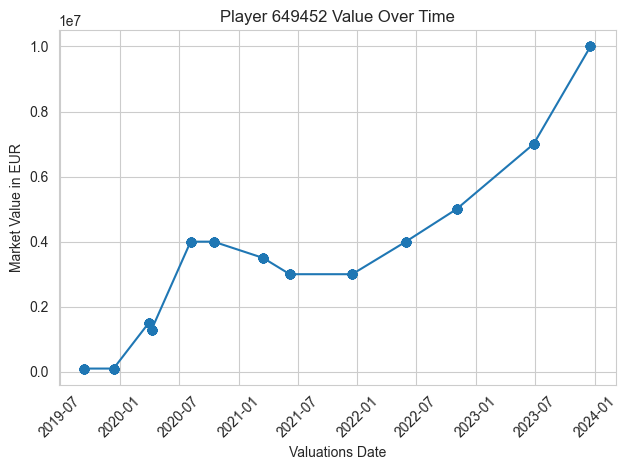

In [185]:
# player_id가 649452인 선수의 데이터를 추출합니다.
player_data = player_value[player_value['player_id'] == 649452]

# valuation_date를 기준으로 정렬합니다.
player_data_sorted = player_data.sort_values(by='valuations_date')

# 그래프를 그립니다.
plt.plot(player_data_sorted['valuations_date'], player_data_sorted['market_value_in_eur'], marker='o')
plt.title('Player 649452 Value Over Time')
plt.xlabel('Valuations Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

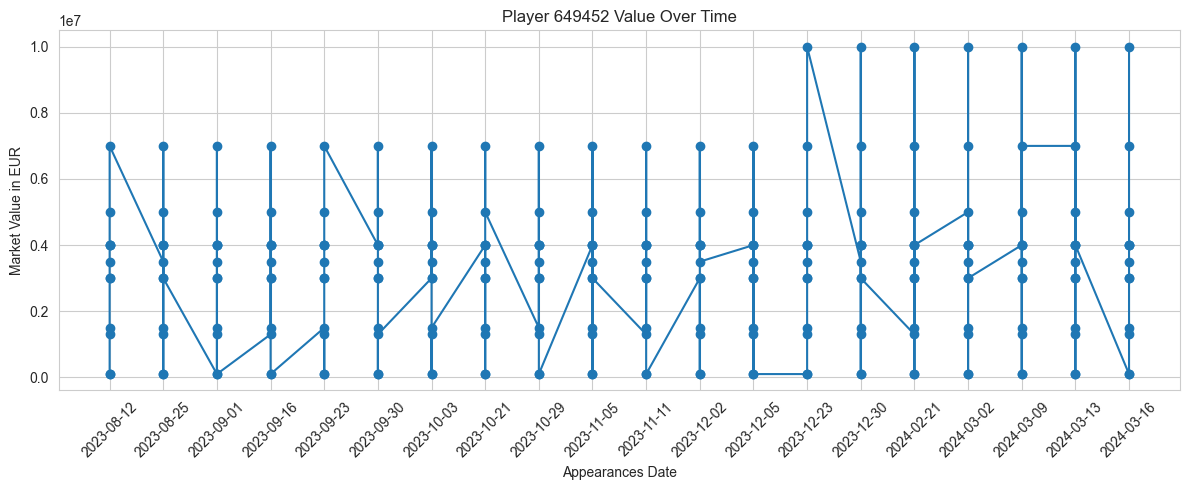

In [186]:
# player_id가 649452인 선수의 데이터를 추출합니다.
player_data = player_value[player_value['player_id'] == 649452]

# appearances_date를 기준으로 정렬합니다.
app_player_data_sorted = player_data.sort_values(by='appearances_date')

# 그래프를 그립니다.
plt.figure(figsize=(12,5))
plt.plot(app_player_data_sorted ['appearances_date'], app_player_data_sorted ['market_value_in_eur'], marker='o')
plt.title('Player 649452 Value Over Time')
plt.xlabel('Appearances Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [187]:
app_player_data_sorted

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
991570,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-08-12,GB1,Luton Town Football Club
991610,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2020-03-30,1500000,1031,2023-08-12,GB1,Luton Town Football Club
991650,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2020-08-06,4000000,1031,2023-08-12,GB1,Luton Town Football Club
991670,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2020-10-16,4000000,1031,2023-08-12,GB1,Luton Town Football Club
991690,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2021-03-17,3500000,1031,2023-08-12,GB1,Luton Town Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991669,4095366,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2020-08-06,4000000,1031,2024-03-16,GB1,Luton Town Football Club
991649,4095366,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2020-04-08,1300000,1031,2024-03-16,GB1,Luton Town Football Club
991769,4095366,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2022-05-30,4000000,1031,2024-03-16,GB1,Luton Town Football Club
991729,4095366,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2021-06-07,3000000,1031,2024-03-16,GB1,Luton Town Football Club


In [188]:
df  = player_value.groupby(['player_id', 'valuations_date'])['appearances_date'].min().reset_index()

In [189]:
df

,player_id,valuations_date,appearances_date
0,2865,2018-06-07,2018-08-12
1,2865,2018-12-19,2018-12-22
2,3333,2018-01-02,2018-08-12
3,3333,2018-05-28,2018-08-12
4,3333,2018-12-19,2018-12-21
...,...,...,...
12961,1005649,2023-10-09,2023-10-21
12962,1005649,2023-12-19,2023-12-23
12963,1005649,2024-03-14,2024-03-16
12964,1082850,2023-07-25,2023-10-28


In [190]:
player_value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538473 entries, 14 to 991829
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   game_id                 538473 non-null  int64         
 1   player_name             538473 non-null  object        
 2   player_id               538473 non-null  int64         
 3   sub_position            538473 non-null  object        
 4   position                538473 non-null  object        
 5   country_of_birth        528000 non-null  object        
 6   country_of_citizenship  528019 non-null  object        
 7   current_club_name       538473 non-null  object        
 8   current_club_id         538473 non-null  int64         
 9   valuations_date         538473 non-null  datetime64[ns]
 10  market_value_in_eur     538473 non-null  int64         
 11  player_club_id          538473 non-null  int64         
 12  appearances_date        538473 non

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12966 entries, 0 to 12965
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   player_id         12966 non-null  int64         
 1   valuations_date   12966 non-null  datetime64[ns]
 2   appearances_date  12966 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 304.0+ KB


In [192]:
merged_df = pd.merge(player_value, df, on=['player_id', 'valuations_date'], how='left')

In [193]:
merged_df.rename(columns={'appearances_date_x' : 'appearances_date', 'appearances_date_y' : 'latest_date'}, inplace=True)

In [194]:
merged_df.sort_values('player_id')

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club,latest_date
0,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
21,3050562,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-12-19,1500000,11,2019-05-12,GB1,Arsenal Football Club,2018-12-22
20,3050551,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-12-19,1500000,11,2019-05-05,GB1,Arsenal Football Club,2018-12-22
19,3050427,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-12-19,1500000,11,2019-02-24,GB1,Arsenal Football Club,2018-12-22
18,3050404,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-12-19,1500000,11,2019-02-03,GB1,Arsenal Football Club,2018-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488111,4095172,Murillo,1005649,Centre-Back,Defender,Brazil,Brazil,Nottingham Forest Football Club,703,2023-07-25,3500000,703,2023-10-29,GB1,Nottingham Forest Football Club,2023-10-01
488109,4095149,Murillo,1005649,Centre-Back,Defender,Brazil,Brazil,Nottingham Forest Football Club,703,2023-07-25,3500000,703,2023-10-07,GB1,Nottingham Forest Football Club,2023-10-01
488112,4095183,Murillo,1005649,Centre-Back,Defender,Brazil,Brazil,Nottingham Forest Football Club,703,2023-07-25,3500000,703,2023-11-05,GB1,Nottingham Forest Football Club,2023-10-01
221580,4095170,Deivid Washington,1082850,Centre-Forward,Attack,Brazil,Brazil,Chelsea Football Club,631,2023-10-09,9000000,631,2023-10-28,GB1,Chelsea Football Club,2023-10-28


In [241]:
# 'appearances_date' 열을 datetime 형식으로 변환
merged_df['appearances_date'] = pd.to_datetime(merged_df['appearances_date'])

# appearances_date와 valuations_date 사이의 차이 계산
merged_df['date_diff'] = (merged_df['valuations_date'] - merged_df['appearances_date']).abs()

# 중복된 행 중에서 appearances_date와 가장 가까운 행 선택
idx = merged_df.groupby(['player_id', 'player_club_id', 'appearances_date'])['date_diff'].idxmin()

# 선택된 인덱스를 제외한 나머지 행 삭제
filtered_df = merged_df.loc[idx]

# 불필요한 열 삭제
filtered_df = filtered_df.drop(columns=['date_diff'])

In [247]:
filtered_df.sort_values('game_id')

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club,latest_date
0,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
2419,3050167,Shkodran Mustafi,88590,Centre-Back,Defender,Germany,Germany,Levante UD,3368,2018-05-28,25000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
224519,3050167,Kevin De Bruyne,88755,Attacking Midfield,Midfield,Belgium,Belgium,Manchester City Football Club,281,2018-05-28,150000000,281,2018-08-12,GB1,Manchester City Football Club,2018-08-12
2696,3050167,Alexandre Lacazette,93720,Centre-Forward,Attack,France,France,Olympique Lyonnais,1041,2018-05-28,60000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
225868,3050167,Kyle Walker,95424,Right-Back,Defender,England,England,Manchester City Football Club,281,2018-05-28,50000000,281,2018-08-12,GB1,Manchester City Football Club,2018-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343330,4095368,Emerson Palmieri,181778,Left-Back,Defender,Brazil,Italy,West Ham United Football Club,379,2023-12-19,12000000,379,2024-03-17,GB1,West Ham United Football Club,2023-12-23
340941,4095368,Vladimir Coufal,157672,Right-Back,Defender,CSSR,Czech Republic,West Ham United Football Club,379,2023-12-19,9000000,379,2024-03-17,GB1,West Ham United Football Club,2023-12-23
350430,4095368,Jarrod Bowen,314875,Right Winger,Attack,England,England,West Ham United Football Club,379,2023-12-19,50000000,379,2024-03-17,GB1,West Ham United Football Club,2023-12-23
335694,4095368,Michail Antonio,104124,Centre-Forward,Attack,England,Jamaica,West Ham United Football Club,379,2023-12-19,6000000,379,2024-03-17,GB1,West Ham United Football Club,2024-02-17


In [243]:
filtered_df[['player_name', 'market_value_in_eur', 'valuations_date', 'appearances_date', 'latest_date']]

,player_name,market_value_in_eur,valuations_date,appearances_date,latest_date
0,Stephan Lichtsteiner,1500000,2018-06-07,2018-08-12,2018-08-12
1,Stephan Lichtsteiner,1500000,2018-06-07,2018-10-22,2018-08-12
2,Stephan Lichtsteiner,1500000,2018-06-07,2018-10-28,2018-08-12
3,Stephan Lichtsteiner,1500000,2018-06-07,2018-12-05,2018-08-12
4,Stephan Lichtsteiner,1500000,2018-06-07,2018-12-08,2018-08-12
...,...,...,...,...,...
488160,Murillo,22000000,2023-12-19,2024-02-24,2023-12-23
488161,Murillo,22000000,2023-12-19,2024-03-02,2023-12-23
488162,Murillo,22000000,2023-12-19,2024-03-10,2023-12-23
488164,Murillo,25000000,2024-03-14,2024-03-16,2024-03-16


In [195]:
merged_df[merged_df['player_id'] ==649452]

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club,latest_date
538226,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-08-12,GB1,Luton Town Football Club,2023-08-12
538227,4087949,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-08-25,GB1,Luton Town Football Club,2023-08-12
538228,4087961,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-01,GB1,Luton Town Football Club,2023-08-12
538229,4087973,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-16,GB1,Luton Town Football Club,2023-08-12
538230,4095069,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-23,GB1,Luton Town Football Club,2023-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538468,4095336,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-02-21,GB1,Luton Town Football Club,2023-12-23
538469,4095344,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-02,GB1,Luton Town Football Club,2023-12-23
538470,4095355,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-09,GB1,Luton Town Football Club,2023-12-23
538471,4095236,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-13,GB1,Luton Town Football Club,2023-12-23


In [249]:
filtered_df.groupby(['latest_date', 'player_club_id','player_club','appearances_date'])['market_value_in_eur'].agg(['sum', 'mean']).reset_index()

,latest_date,player_club_id,player_club,appearances_date,sum,mean
0,2018-08-10,985,Manchester United Football Club,2018-08-10,570000000,4.071429e+07
1,2018-08-10,985,Manchester United Football Club,2018-08-19,451000000,4.510000e+07
2,2018-08-10,985,Manchester United Football Club,2018-08-27,385000000,5.500000e+07
3,2018-08-10,985,Manchester United Football Club,2018-09-02,485000000,5.388889e+07
4,2018-08-10,985,Manchester United Football Club,2018-09-15,412000000,5.150000e+07
...,...,...,...,...,...,...
17590,2024-03-16,1031,Luton Town Football Club,2024-03-16,35000000,8.750000e+06
17591,2024-03-16,1132,Burnley Football Club,2024-03-16,17000000,8.500000e+06
17592,2024-03-16,1148,Brentford Football Club,2024-03-16,120000000,2.400000e+07
17593,2024-03-17,379,West Ham United Football Club,2024-03-17,103000000,3.433333e+07


In [226]:
merged_df.groupby(['latest_date', 'player_club_id','player_club','appearances_date'])['market_value_in_eur'].agg(['sum', 'mean']).reset_index()

,latest_date,player_club_id,player_club,appearances_date,sum,mean
0,2018-08-10,29,Everton Football Club,2021-08-14,35000000,1.750000e+07
1,2018-08-10,29,Everton Football Club,2021-08-21,35000000,1.750000e+07
2,2018-08-10,29,Everton Football Club,2021-08-28,35000000,1.750000e+07
3,2018-08-10,29,Everton Football Club,2021-09-13,35000000,1.750000e+07
4,2018-08-10,29,Everton Football Club,2021-09-18,35000000,1.750000e+07
...,...,...,...,...,...,...
127054,2024-03-16,1031,Luton Town Football Club,2024-03-16,35000000,8.750000e+06
127055,2024-03-16,1132,Burnley Football Club,2024-03-16,70200000,3.694737e+06
127056,2024-03-16,1148,Brentford Football Club,2024-03-16,120000000,2.400000e+07
127057,2024-03-17,379,West Ham United Football Club,2024-03-17,103000000,3.433333e+07


In [246]:
filtered_df[(filtered_df['appearances_date'] == '2018-08-12') & (filtered_df['player_club'] == 'Arsenal Football Club')]

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club,latest_date
0,3050167,Stephan Lichtsteiner,2865,Right-Back,Defender,Switzerland,Switzerland,FC Augsburg 1907,167,2018-06-07,1500000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
29,3050167,Petr Cech,5658,Goalkeeper,Goalkeeper,CSSR,Czech Republic,Arsenal Football Club,11,2018-05-28,3000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
36,3050167,Sokratis Papastathopoulos,34322,Centre-Back,Defender,Greece,Greece,Real Betis Balompié S.A.D.,150,2018-06-05,20000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
222,3050167,Mesut Özil,35664,Attacking Midfield,Midfield,Germany,Germany,İstanbul Başakşehir Futbol Kulübü,6890,2018-07-16,45000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
727,3050167,Aaron Ramsey,50057,Central Midfield,Midfield,Wales,Wales,Olympique Gymnaste Club Nice Côte d'Azur,417,2018-05-28,45000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
1085,3050167,Henrikh Mkhitaryan,55735,Central Midfield,Midfield,UdSSR,Armenia,Football Club Internazionale Milano S.p.A.,46,2018-05-28,35000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
1130,3050167,Pierre-Emerick Aubameyang,58864,Centre-Forward,Attack,France,Gabon,Olympique de Marseille,244,2018-05-28,75000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
2419,3050167,Shkodran Mustafi,88590,Centre-Back,Defender,Germany,Germany,Levante UD,3368,2018-05-28,25000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
2696,3050167,Alexandre Lacazette,93720,Centre-Forward,Attack,France,France,Olympique Lyonnais,1041,2018-05-28,60000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12
4442,3050167,Granit Xhaka,111455,Defensive Midfield,Midfield,Switzerland,Switzerland,Bayer 04 Leverkusen Fußball,15,2018-05-28,40000000,11,2018-08-12,GB1,Arsenal Football Club,2018-08-12


In [239]:
filtered_data = merged_df[(merged_df['appearances_date'] == '2021-08-14') & (merged_df['player_club'] == 'Everton Football Club')]
player_names_values = filtered_data[['player_name', 'market_value_in_eur', 'valuations_date', 'appearances_date', 'latest_date']]
player_names_values 

,player_name,market_value_in_eur,valuations_date,appearances_date,latest_date
283285,Andros Townsend,12000000,2018-01-02,2021-08-14,2018-08-11
283306,Andros Townsend,15000000,2018-05-28,2021-08-14,2018-08-11
283327,Andros Townsend,15000000,2018-12-19,2021-08-14,2018-12-22
283348,Andros Townsend,15000000,2019-06-13,2021-08-14,2019-08-10
283369,Andros Townsend,15000000,2019-12-10,2021-08-14,2020-02-01
...,...,...,...,...,...
306401,Anthony Gordon,1500000,2019-12-10,2021-08-14,2020-01-18
306464,Anthony Gordon,1300000,2020-04-08,2021-08-14,2020-06-21
306518,Anthony Gordon,5000000,2020-07-30,2021-08-14,2020-10-25
306572,Anthony Gordon,5000000,2020-10-13,2021-08-14,2020-10-25


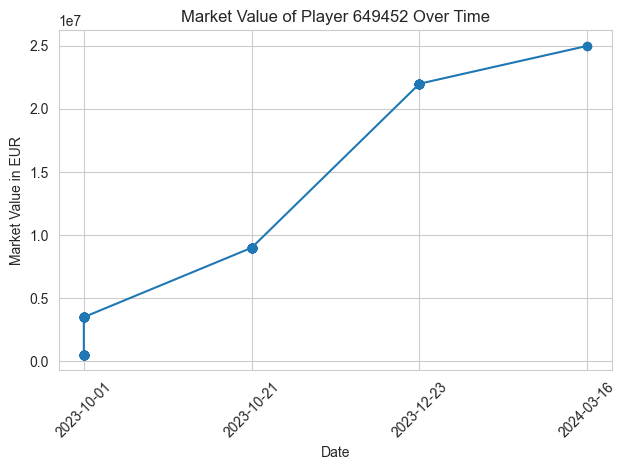

In [198]:
# player_id가 649452인 선수의 데이터를 필터링합니다.
player_data = merged_df[merged_df['player_id'] == 1005649]

# 시계열 데이터 시각화
plt.plot(player_data['latest_date'], player_data['market_value_in_eur'], marker='o')
plt.title('Market Value of Player 649452 Over Time')
plt.xlabel('Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [199]:
player_value[player_value['player_id'] == 649452]

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
991570,4087927,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-08-12,GB1,Luton Town Football Club
991571,4087949,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-08-25,GB1,Luton Town Football Club
991572,4087961,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-01,GB1,Luton Town Football Club
991573,4087973,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-16,GB1,Luton Town Football Club
991574,4095069,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2019-09-13,100000,1031,2023-09-23,GB1,Luton Town Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991825,4095336,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-02-21,GB1,Luton Town Football Club
991826,4095344,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-02,GB1,Luton Town Football Club
991827,4095355,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-09,GB1,Luton Town Football Club
991828,4095236,Issa Kaboré,649452,Right-Back,Defender,Burkina Faso,Burkina Faso,Luton Town Football Club,1031,2023-12-19,10000000,1031,2024-03-13,GB1,Luton Town Football Club


In [200]:
player_value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538473 entries, 14 to 991829
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   game_id                 538473 non-null  int64         
 1   player_name             538473 non-null  object        
 2   player_id               538473 non-null  int64         
 3   sub_position            538473 non-null  object        
 4   position                538473 non-null  object        
 5   country_of_birth        528000 non-null  object        
 6   country_of_citizenship  528019 non-null  object        
 7   current_club_name       538473 non-null  object        
 8   current_club_id         538473 non-null  int64         
 9   valuations_date         538473 non-null  datetime64[ns]
 10  market_value_in_eur     538473 non-null  int64         
 11  player_club_id          538473 non-null  int64         
 12  appearances_date        538473 non

In [201]:
# market_value_in_eur의 고유값이 변하는지 확인하기 위해 그룹별로 valuations_date를 최소값으로 설정합니다.
min_valuations_date = player_value.groupby(['player_id', 'market_value_in_eur'])['valuations_date'].transform('min')
min_valuations_date

14       2018-06-07
15       2018-06-07
16       2018-06-07
17       2018-06-07
18       2018-06-07
            ...    
991825   2023-12-19
991826   2023-12-19
991827   2023-12-19
991828   2023-12-19
991829   2023-12-19
Name: valuations_date, Length: 538473, dtype: datetime64[ns]

In [202]:
# market_value_in_eur의 고유값이 변하는 행들을 필터링합니다.
filtered_player_value = player_value[player_value['valuations_date'] == min_valuations_date]

In [203]:
player_data_sorted = player_data_sorted[['game_id', 'player_id', 'valuations_date', 'market_value_in_eur', 'appearances_date', 'player_club_id']]

In [204]:
filtered_player_value_2 = player_value.sort_values(by='valuations_date').drop_duplicates(subset=['player_name', 'market_value_in_eur'], keep='first')

In [205]:
filtered_player_value_2[filtered_player_value_2['player_id'] == 59377]

,game_id,player_name,player_id,sub_position,position,country_of_birth,country_of_citizenship,current_club_name,current_club_id,valuations_date,market_value_in_eur,player_club_id,appearances_date,competition_id,player_club
307247,3050243,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2018-01-02,50000000,985,2018-10-06,GB1,Manchester United Football Club
307566,3838034,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2018-03-23,60000000,985,2022-10-16,GB1,Manchester United Football Club
307693,3429731,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2018-05-28,70000000,985,2021-02-14,GB1,Manchester United Football Club
308100,3838034,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2019-06-13,65000000,985,2022-10-16,GB1,Manchester United Football Club
308591,3592028,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2020-04-08,40000000,985,2021-09-11,GB1,Manchester United Football Club
308830,3838703,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2020-10-13,35000000,985,2023-04-02,GB1,Manchester United Football Club
308951,3592015,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2020-12-17,25000000,985,2021-10-16,GB1,Manchester United Football Club
309123,3583526,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2021-03-18,22000000,985,2021-08-22,GB1,Manchester United Football Club
309370,3838714,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2021-05-31,18000000,985,2023-05-04,GB1,Manchester United Football Club
309685,3592237,David de Gea,59377,Goalkeeper,Goalkeeper,Spain,Spain,Manchester United Football Club,985,2022-03-29,15000000,985,2022-04-02,GB1,Manchester United Football Club


In [206]:
player_value[player_value['player_id'] == 649452]['market_value_in_eur'].unique()

array([  100000,  1500000,  1300000,  4000000,  3500000,  3000000,
        5000000,  7000000, 10000000], dtype=int64)

In [207]:
player_value[player_value['game_id'] == 3050167]['player_name'].unique()

array(['Stephan Lichtsteiner', 'Petr Cech', 'Sokratis Papastathopoulos',
       'Mesut Özil', 'Aaron Ramsey', 'Henrikh Mkhitaryan',
       'Pierre-Emerick Aubameyang', 'Shkodran Mustafi',
       'Alexandre Lacazette', 'Granit Xhaka', 'Héctor Bellerín',
       'Ainsley Maitland-Niles', 'Lucas Torreira', 'Mattéo Guendouzi',
       'Fernandinho', 'Sergio Agüero', 'İlkay Gündoğan',
       'Kevin De Bruyne', 'Kyle Walker', 'Raheem Sterling',
       'Benjamin Mendy', 'Riyad Mahrez', 'Aymeric Laporte', 'John Stones',
       'Leroy Sané', 'Ederson', 'Bernardo Silva', 'Gabriel Jesus'],
      dtype=object)

In [208]:
player_value['appearances_date'] = pd.to_datetime(player_value['appearances_date'])

In [209]:
# date를 기반으로 season 칼럼 생성
player_value['season'] = player_value['appearances_date'].apply(get_season)

In [210]:
player_value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538473 entries, 14 to 991829
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   game_id                 538473 non-null  int64         
 1   player_name             538473 non-null  object        
 2   player_id               538473 non-null  int64         
 3   sub_position            538473 non-null  object        
 4   position                538473 non-null  object        
 5   country_of_birth        528000 non-null  object        
 6   country_of_citizenship  528019 non-null  object        
 7   current_club_name       538473 non-null  object        
 8   current_club_id         538473 non-null  int64         
 9   valuations_date         538473 non-null  datetime64[ns]
 10  market_value_in_eur     538473 non-null  int64         
 11  player_club_id          538473 non-null  int64         
 12  appearances_date        538473 non

In [211]:
test = player_value.groupby(['player_club', 'season', 'appearances_date', 'game_id'])['market_value_in_eur'].agg('sum').reset_index()

In [212]:
player_value.groupby(['player_club', 'season', 'appearances_date'])['market_value_in_eur'].agg(['sum', 'mean']).reset_index()

,player_club,season,appearances_date,sum,mean
0,Arsenal Football Club,1819,2018-08-12,808000000,3.232000e+07
1,Arsenal Football Club,1819,2018-08-18,852500000,3.157407e+07
2,Arsenal Football Club,1819,2018-08-25,737500000,2.836538e+07
3,Arsenal Football Club,1819,2018-09-02,857500000,3.175926e+07
4,Arsenal Football Club,1819,2018-09-15,857500000,3.175926e+07
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,2024-02-10,3133100000,1.464065e+07
4362,Wolverhampton Wanderers Football Club,2324,2024-02-17,2942850000,1.368767e+07
4363,Wolverhampton Wanderers Football Club,2324,2024-02-25,2949000000,1.391038e+07
4364,Wolverhampton Wanderers Football Club,2324,2024-03-02,2517650000,1.277995e+07


In [213]:
test

,player_club,season,appearances_date,game_id,market_value_in_eur
0,Arsenal Football Club,1819,2018-08-12,3050167,808000000
1,Arsenal Football Club,1819,2018-08-18,3050180,852500000
2,Arsenal Football Club,1819,2018-08-25,3050187,737500000
3,Arsenal Football Club,1819,2018-09-02,3050199,857500000
4,Arsenal Football Club,1819,2018-09-15,3050212,857500000
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,2024-02-10,4095319,3133100000
4362,Wolverhampton Wanderers Football Club,2324,2024-02-17,4095329,2942850000
4363,Wolverhampton Wanderers Football Club,2324,2024-02-25,4095339,2949000000
4364,Wolverhampton Wanderers Football Club,2324,2024-03-02,4095346,2517650000


In [214]:
test

,player_club,season,appearances_date,game_id,market_value_in_eur
0,Arsenal Football Club,1819,2018-08-12,3050167,808000000
1,Arsenal Football Club,1819,2018-08-18,3050180,852500000
2,Arsenal Football Club,1819,2018-08-25,3050187,737500000
3,Arsenal Football Club,1819,2018-09-02,3050199,857500000
4,Arsenal Football Club,1819,2018-09-15,3050212,857500000
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,2024-02-10,4095319,3133100000
4362,Wolverhampton Wanderers Football Club,2324,2024-02-17,4095329,2942850000
4363,Wolverhampton Wanderers Football Club,2324,2024-02-25,4095339,2949000000
4364,Wolverhampton Wanderers Football Club,2324,2024-03-02,4095346,2517650000


In [215]:
test['player_club'].nunique()

28

In [216]:
# 각 팀 별 시즌별 마지막 appearances_date 찾기
latest_appearances = test.groupby(['player_club', 'season', 'game_id'])['appearances_date'].max().reset_index()

In [217]:
latest_appearances

,player_club,season,game_id,appearances_date
0,Arsenal Football Club,1819,3050167,2018-08-12
1,Arsenal Football Club,1819,3050180,2018-08-18
2,Arsenal Football Club,1819,3050187,2018-08-25
3,Arsenal Football Club,1819,3050199,2018-09-02
4,Arsenal Football Club,1819,3050212,2018-09-15
...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,4095319,2024-02-10
4362,Wolverhampton Wanderers Football Club,2324,4095329,2024-02-17
4363,Wolverhampton Wanderers Football Club,2324,4095339,2024-02-25
4364,Wolverhampton Wanderers Football Club,2324,4095346,2024-03-02


In [218]:
# 해당 날짜에 해당하는 행 선택
latest_values = latest_appearances.merge(test, on=['player_club', 'season', 'appearances_date', 'game_id'], how='inner')

In [219]:
latest_values

,player_club,season,game_id,appearances_date,market_value_in_eur
0,Arsenal Football Club,1819,3050167,2018-08-12,808000000
1,Arsenal Football Club,1819,3050180,2018-08-18,852500000
2,Arsenal Football Club,1819,3050187,2018-08-25,737500000
3,Arsenal Football Club,1819,3050199,2018-09-02,857500000
4,Arsenal Football Club,1819,3050212,2018-09-15,857500000
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,4095319,2024-02-10,3133100000
4362,Wolverhampton Wanderers Football Club,2324,4095329,2024-02-17,2942850000
4363,Wolverhampton Wanderers Football Club,2324,4095339,2024-02-25,2949000000
4364,Wolverhampton Wanderers Football Club,2324,4095346,2024-03-02,2517650000


In [220]:
# market_value_in_eur 열 추출
market_values = latest_values[['player_club', 'season', 'market_value_in_eur', 'game_id']]

In [221]:
market_values

,player_club,season,market_value_in_eur,game_id
0,Arsenal Football Club,1819,808000000,3050167
1,Arsenal Football Club,1819,852500000,3050180
2,Arsenal Football Club,1819,737500000,3050187
3,Arsenal Football Club,1819,857500000,3050199
4,Arsenal Football Club,1819,857500000,3050212
...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,3133100000,4095319
4362,Wolverhampton Wanderers Football Club,2324,2942850000,4095329
4363,Wolverhampton Wanderers Football Club,2324,2949000000,4095339
4364,Wolverhampton Wanderers Football Club,2324,2517650000,4095346


In [222]:
# 각 팀 별로 시즌을 그룹화하여 누적 합 계산
market_values['cumulative_season'] = market_values.groupby('player_club')['season'].cumcount() + 1

In [223]:
market_values

,player_club,season,market_value_in_eur,game_id,cumulative_season
0,Arsenal Football Club,1819,808000000,3050167,1
1,Arsenal Football Club,1819,852500000,3050180,2
2,Arsenal Football Club,1819,737500000,3050187,3
3,Arsenal Football Club,1819,857500000,3050199,4
4,Arsenal Football Club,1819,857500000,3050212,5
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,3133100000,4095319,214
4362,Wolverhampton Wanderers Football Club,2324,2942850000,4095329,215
4363,Wolverhampton Wanderers Football Club,2324,2949000000,4095339,216
4364,Wolverhampton Wanderers Football Club,2324,2517650000,4095346,217


In [224]:
# player_club이 중복되는 행을 찾음
duplicated_clubs = market_values['player_club'].duplicated(keep=False)
# 중복되지 않은 player_club 값을 가진 행 선택
cleaned_market_values = market_values[duplicated_clubs]

In [225]:
cleaned_market_values

,player_club,season,market_value_in_eur,game_id,cumulative_season
0,Arsenal Football Club,1819,808000000,3050167,1
1,Arsenal Football Club,1819,852500000,3050180,2
2,Arsenal Football Club,1819,737500000,3050187,3
3,Arsenal Football Club,1819,857500000,3050199,4
4,Arsenal Football Club,1819,857500000,3050212,5
...,...,...,...,...,...
4361,Wolverhampton Wanderers Football Club,2324,3133100000,4095319,214
4362,Wolverhampton Wanderers Football Club,2324,2942850000,4095329,215
4363,Wolverhampton Wanderers Football Club,2324,2949000000,4095339,216
4364,Wolverhampton Wanderers Football Club,2324,2517650000,4095346,217
